#**Data Analysis**

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson ransformation
import scipy.stats as stats

# to display alll the columns of the dataframe in the nootbook
pd.pandas.set_option('display.max_columns', None)


In [2]:
# load dataset
data = pd.read_csv('train.csv')

# raw and coumns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# drop id , it is just a number given to identifiy each house
data.drop('Id', axis = 1, inplace=True)

data.shape

(1460, 80)

#**Target**

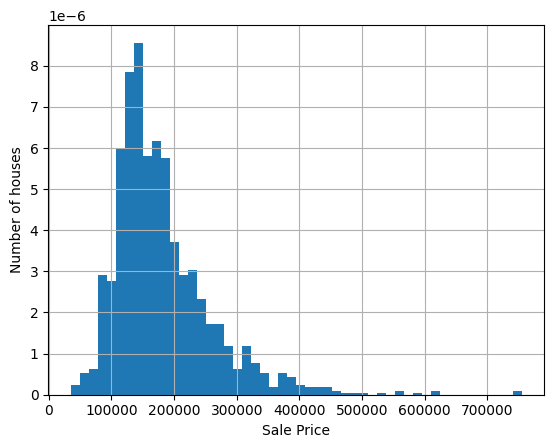

In [4]:
# histogram to evalute target distribution

data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

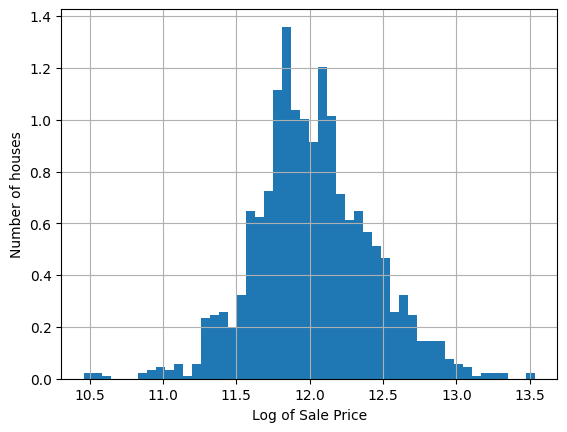

In [5]:
# Let's transform the target using the logarithm

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

#**Variable Types**

In [6]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# Let's identify the categorical variables
# we will capture those of type 'object'

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)

# lets add MSSubClass to the list of categorical variables

cat_vars = cat_vars + ['MSSubClass']

# number of categorical variables
len(cat_vars)


44

In [8]:
cat_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [9]:
data[cat_vars]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

In [10]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [11]:
# now let's identify the numerical variables

num_vars = {
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
}

# number of Numerical variables
len(num_vars)

35

In [12]:
num_vars

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

#Missing values

In [13]:
# make a list of te varaibles that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

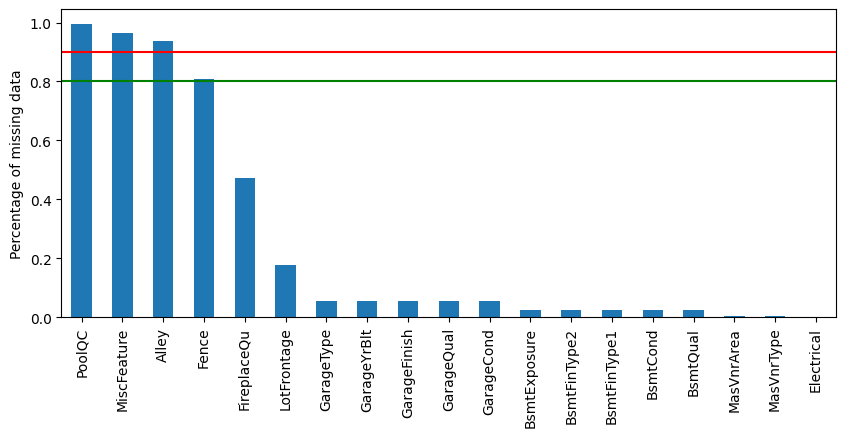

In [14]:
# plot
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))

plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [15]:
# now we can determine which variables from those with missing data
# are numerical and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print("Number of categorical variables with na : " , len(cat_na))
print('Number of numerical variables with na : ', len(num_na))

Number of categorical variables with na :  16
Number of numerical variables with na :  3


In [16]:
num_na

['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

In [17]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#**Relationship between missing data and Sale Price**

In [18]:
def analyse_na_value(df, var):

  # copy of the dataframe so that we do not override the original data
  # see the link for more details about pandas.copy()
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
  df = df.copy()

  # Let's make an interim variable that indicates 1 if the
  # observations was missing or 0 otherwise
  df[var] = np.where(df[var].isnull(), 1, 0)

  # let's compare the median SalePrice in the observations where data is missing
  # vs the observations where the data is availabe

  # determines the median price in the groups 1 and 0,
  # and the standard deviation of the sale price
  # an we capture the results in a temporary dataset
  tmp = df.groupby(var)['SalePrice'].agg(['mean','std'])

  # plot into a bar graph
  tmp.plot(kind='barh', y='mean' , legend= False
          , xerr ='std', title = 'Sale Price', color='green')

  plt.show()


In [19]:
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

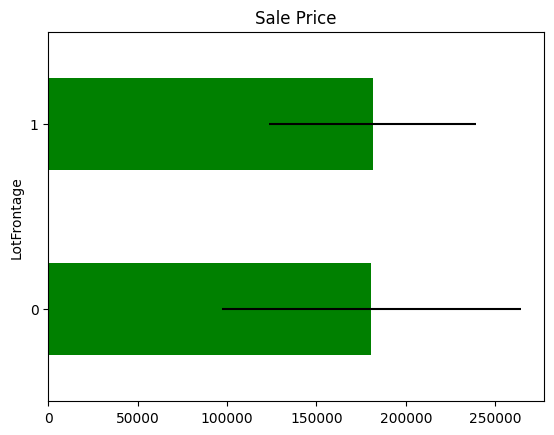

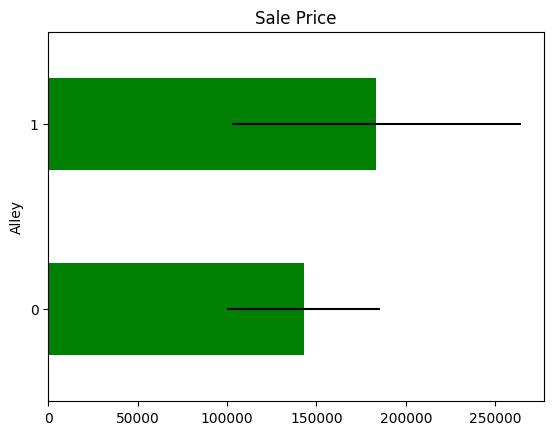

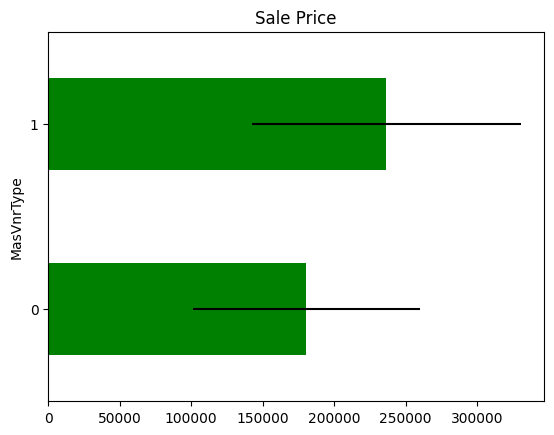

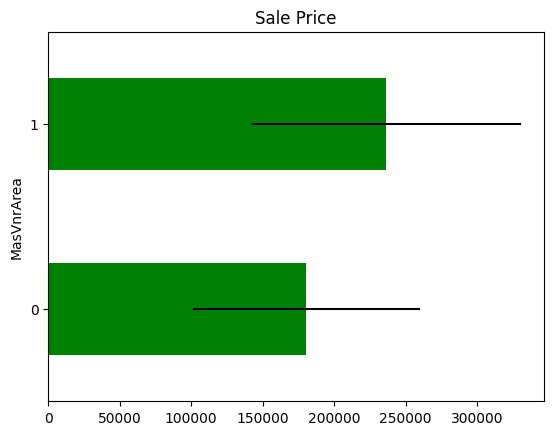

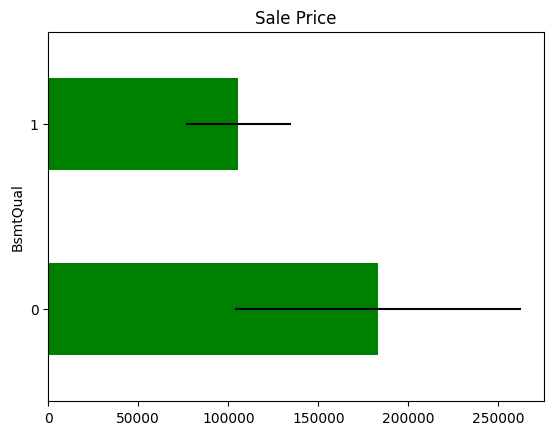

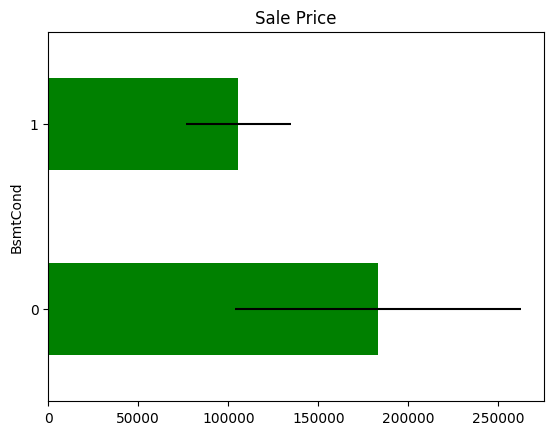

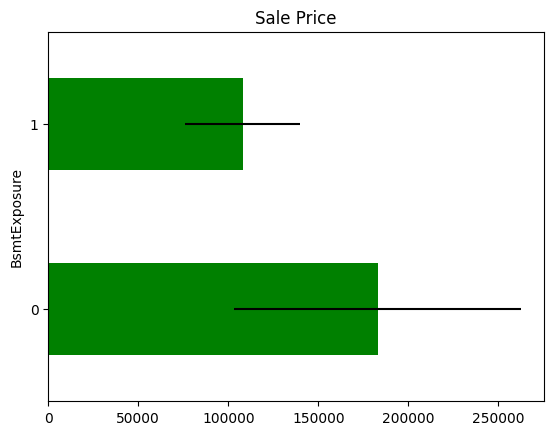

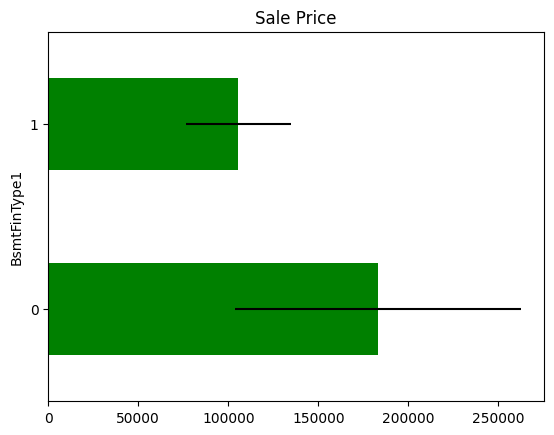

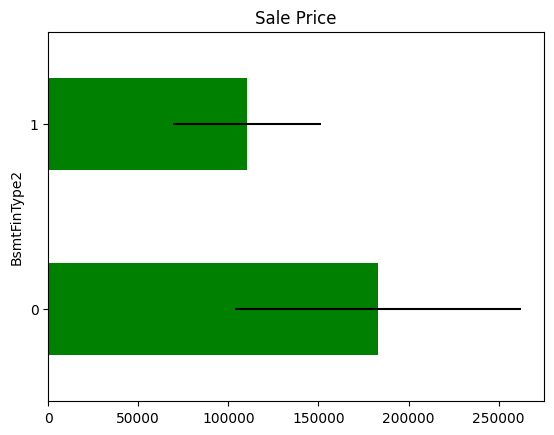

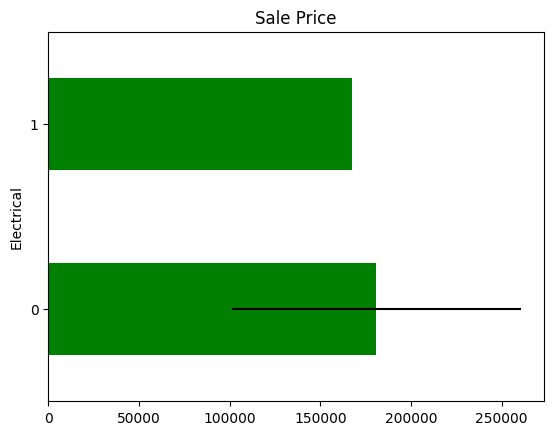

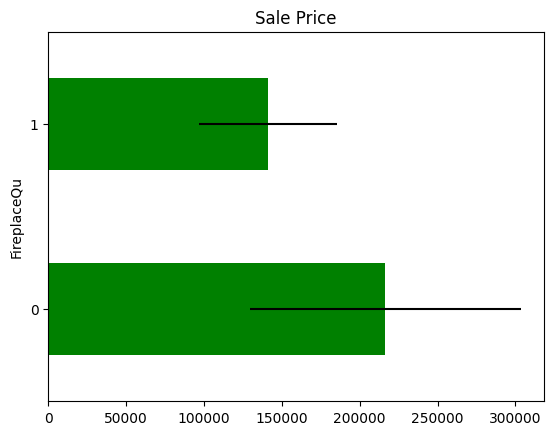

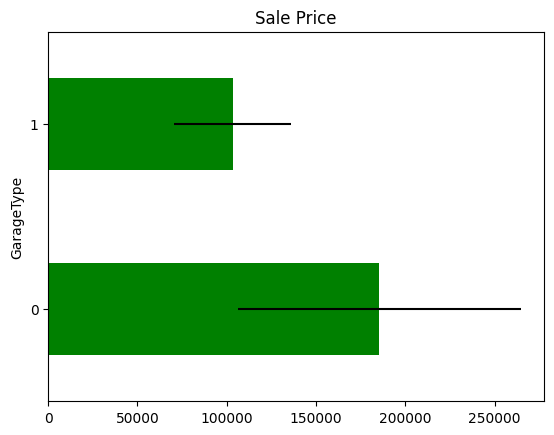

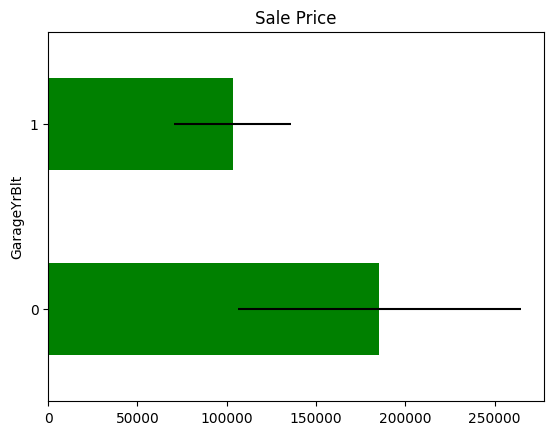

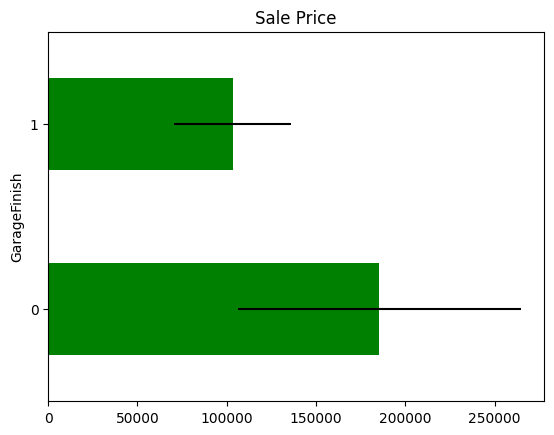

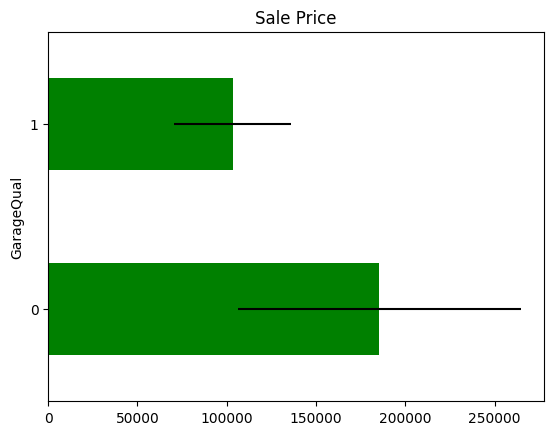

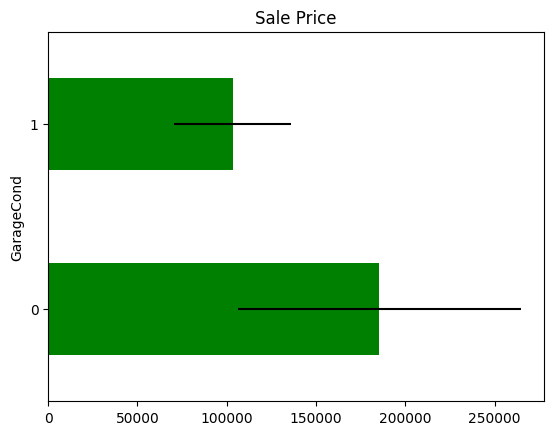

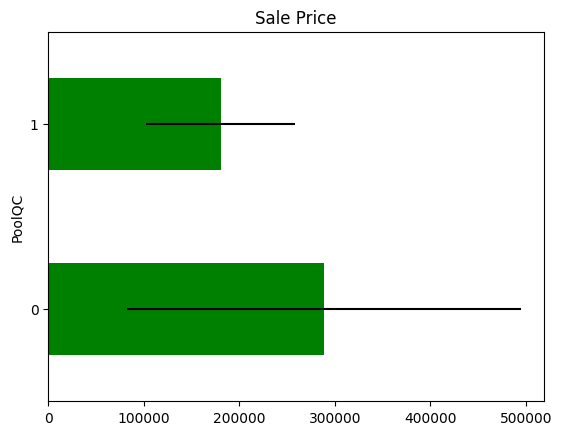

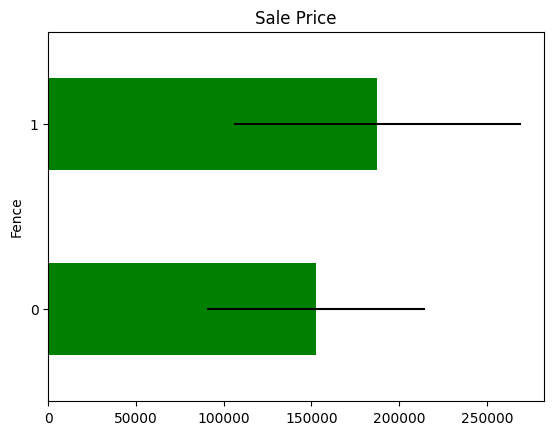

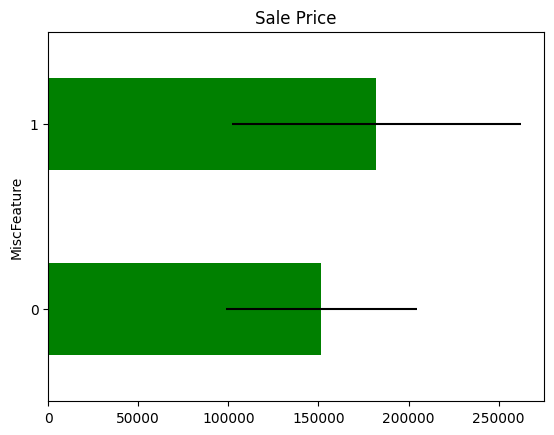

In [20]:
# let's run the function an each variable with missing data
for var in vars_with_na:
  analyse_na_value(data, var)

#**Numerical variables**

In [21]:
print('Nummber of numerical variables: ' , len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Nummber of numerical variables:  35


<ipython-input-21-2b231d74269e>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[num_vars].head()


GrLivArea  BsmtFinSF1  GarageArea  KitchenAbvGr  MiscVal  MasVnrArea  \
0       1710         706         548             1        0       196.0   
1       1262         978         460             1        0         0.0   
2       1786         486         608             1        0       162.0   
3       1717         216         642             1        0         0.0   
4       2198         655         836             1        0       350.0   

   TotalBsmtSF  GarageYrBlt  Fireplaces  2ndFlrSF  GarageCars  BsmtFinSF2  \
0          856       2003.0           0       854           2           0   
1         1262       1976.0           1         0           2           0   
2          920       2001.0           1       866           2           0   
3          756       1998.0           1       756           3           0   
4         1145       2000.0           1      1053           3           0   

   FullBath  BsmtHalfBath  OpenPorchSF  YearBuilt  MoSold  WoodDeckSF  \
0         2             0           61       2003       2           0   
1         2             1            0       1976       5         298   
2         2             0           42       2001       9           0   
3         1             0           35       1915       2           0   
4         2             0           84       2000      12         192   

   EnclosedPorch  BedroomAbvGr  HalfBath  3SsnPorch  BsmtFullBath  \
0              0             3         1          0             1   
1              0             3         0          0             0   
2              0             3         1          0             1   
3            272             3         0          0             1   
4              0             4         1          0             1   

   TotRmsAbvGrd  PoolArea  LowQualFinSF  ScreenPorch  LotArea  1stFlrSF  \
0             8         0             0            0     8450       856   
1             6         0             0            0     9600      1262   
2             6         0             0            0    11250       920   
3             7         0             0            0     9550       961   
4             9         0             0            0    14260      1145   

   BsmtUnfSF  YrSold  LotFrontage  OverallCond  OverallQual  YearRemodAdd  
0        150    2008         65.0            5            7          2003  
1        284    2007         80.0            8            6          1976  
2        434    2008         68.0            5            7          2002  
3        540    2006         60.0            5            7          1970  
4        490    2008         84.0            5            8          2000

#**Temporal Variables**

In [22]:
# list of variables that contain year information

year_vars  = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['GarageYrBlt', 'YearBuilt', 'YrSold', 'YearRemodAdd']

In [23]:
# let's explore the values of these temporal variables

for var in year_vars:
  print(var, data[var].unique())
  print()

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 200

Text(0, 0.5, 'Median House Price')

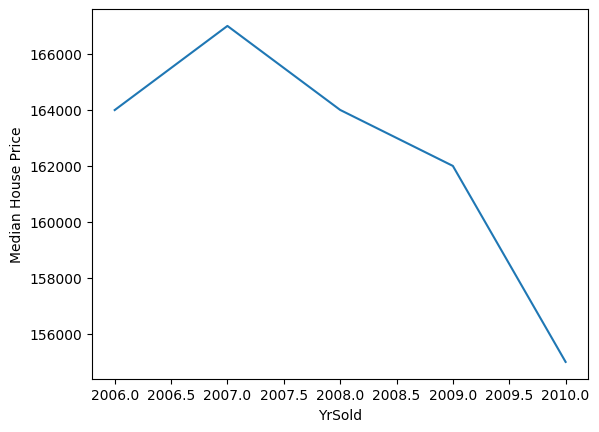

In [24]:
# plot the median sale price vs year in which it was sold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')


Text(0, 0.5, 'Median House Price')

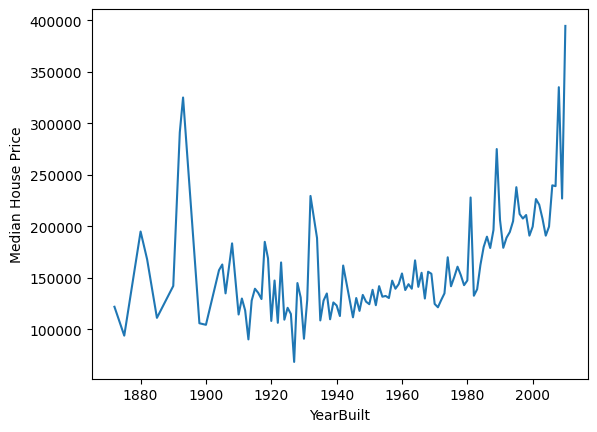

In [25]:
# plot the median sale price vs year in which it was built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')


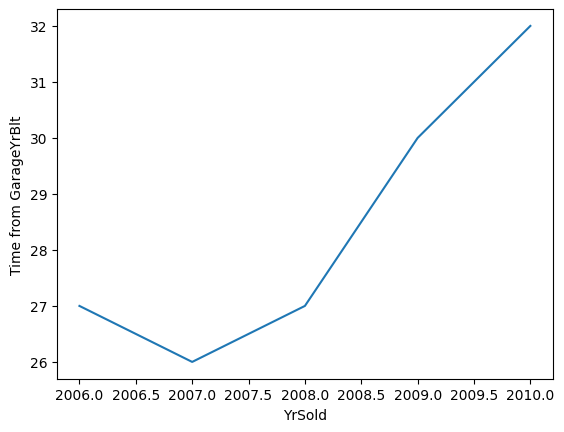

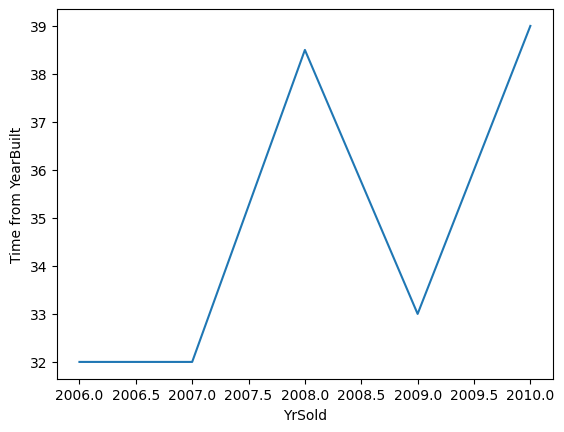

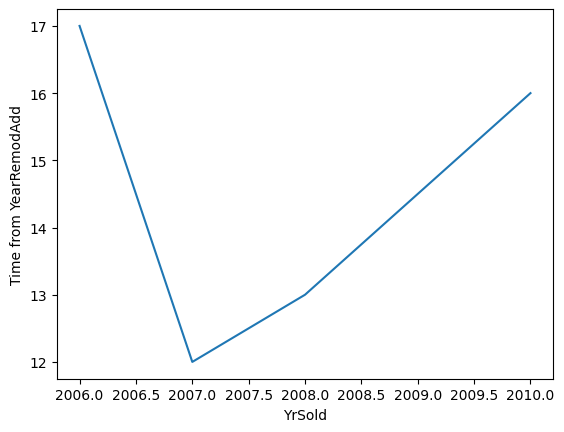

In [26]:
def analyse_year_vars(df, var):

  df = df.copy()

  # capture the difference between a year and a year in which house was sold
  df[var] = df['YrSold'] - df[var]

  df.groupby('YrSold')[var].median().plot()
  plt.ylabel('Time from ' + var)
  plt.show()


for var in year_vars:
  if var != 'YrSold':
    analyse_year_vars(data, var)

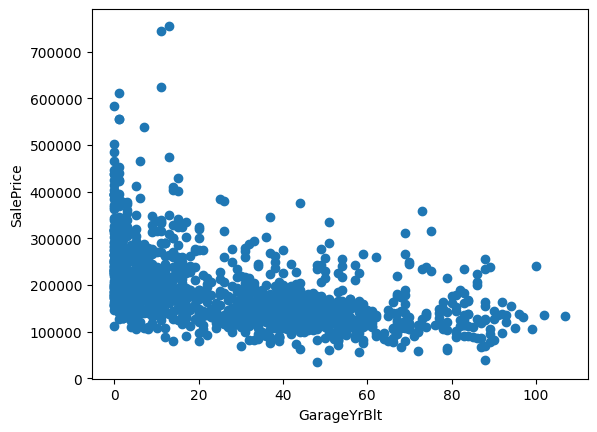

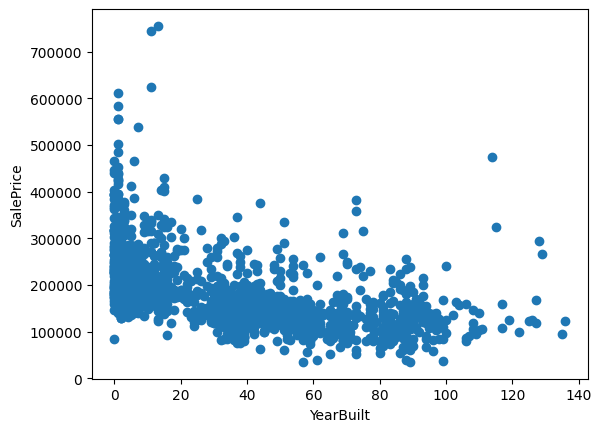

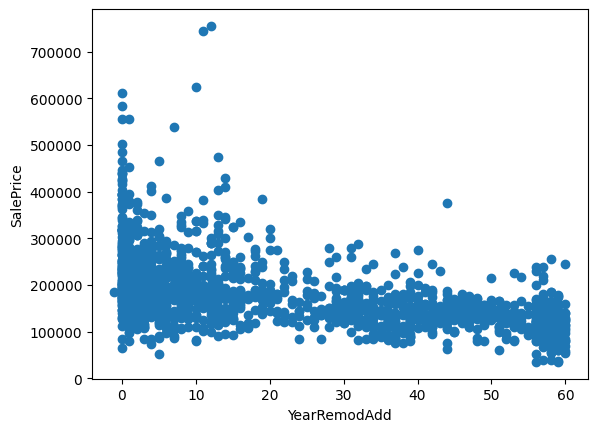

In [27]:
def analyse_year_vars(df, var):

  df = df.copy()

  # capture difference between a year variable and year in which house was sold
  df[var] = df['YrSold'] - df [var]

  plt.scatter(df[var], df['SalePrice'])
  plt.ylabel('SalePrice')
  plt.xlabel(var)
  plt.show()


for var in year_vars:
  if var != 'YrSold':
    analyse_year_vars(data,var)

#**Discrete variables**

In [28]:
# let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars ]

print('Number of discrete variables: ' , len(discrete_vars))

Number of discrete variables:  13


In [29]:
# let's visualise the discrete variables

data[discrete_vars].head()

KitchenAbvGr  Fireplaces  GarageCars  FullBath  BsmtHalfBath  MoSold  \
0             1           0           2         2             0       2   
1             1           1           2         2             1       5   
2             1           1           2         2             0       9   
3             1           1           3         1             0       2   
4             1           1           3         2             0      12   

   BedroomAbvGr  HalfBath  BsmtFullBath  TotRmsAbvGrd  PoolArea  OverallCond  \
0             3         1             1             8         0            5   
1             3         0             0             6         0            8   
2             3         1             1             6         0            5   
3             3         0             1             7         0            5   
4             4         1             1             9         0            5   

   OverallQual  
0            7  
1            6  
2            7  
3            7  
4            8

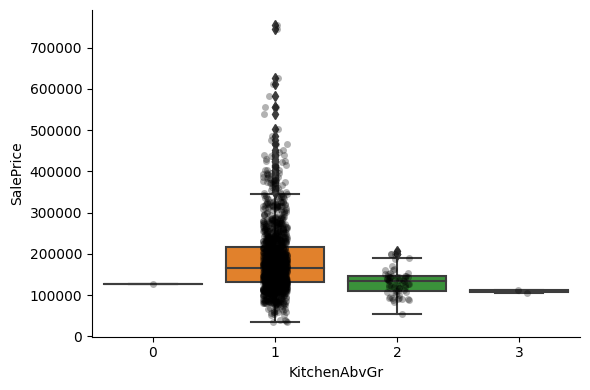

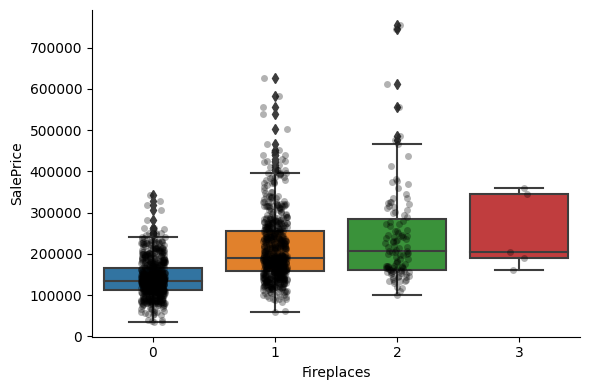

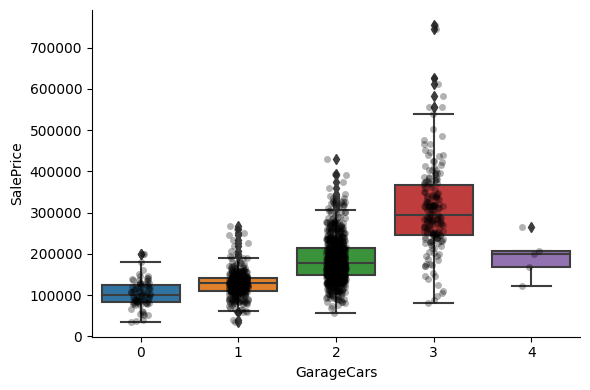

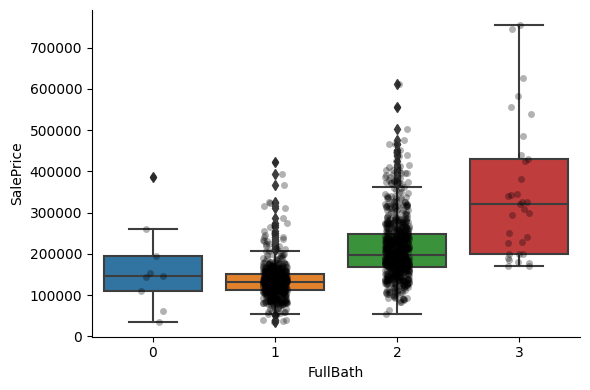

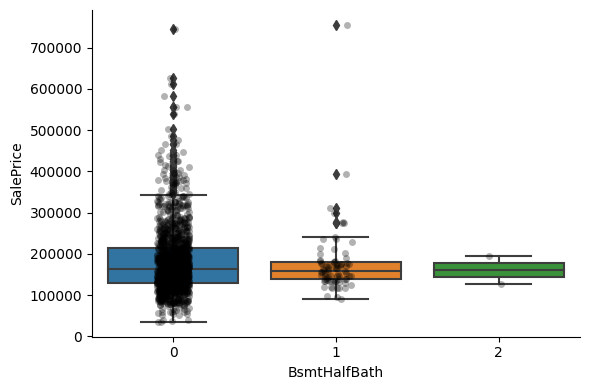

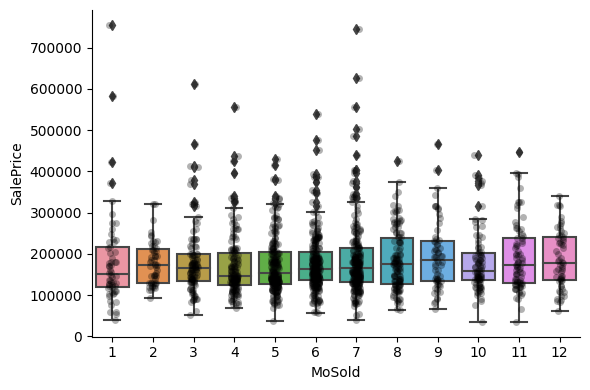

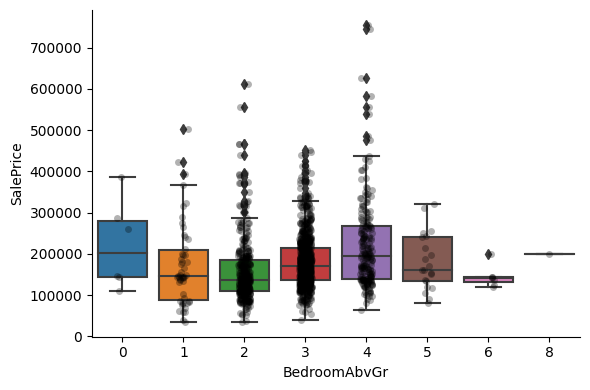

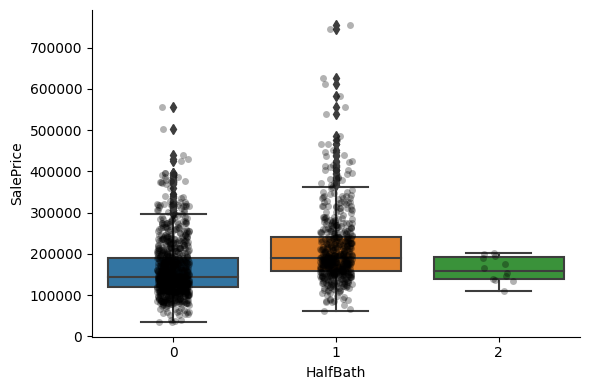

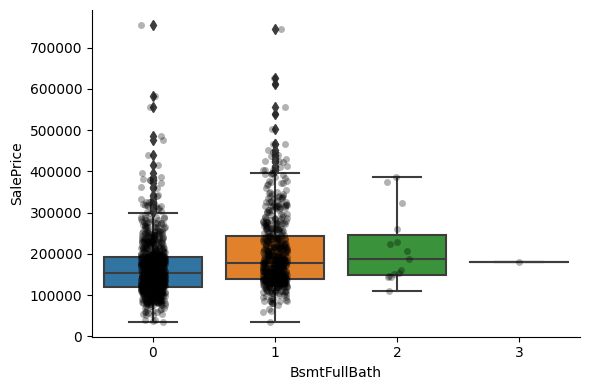

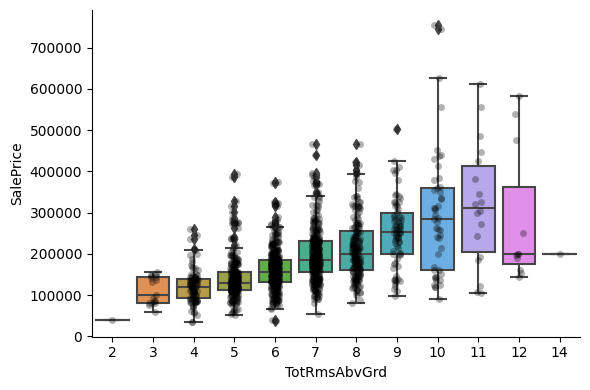

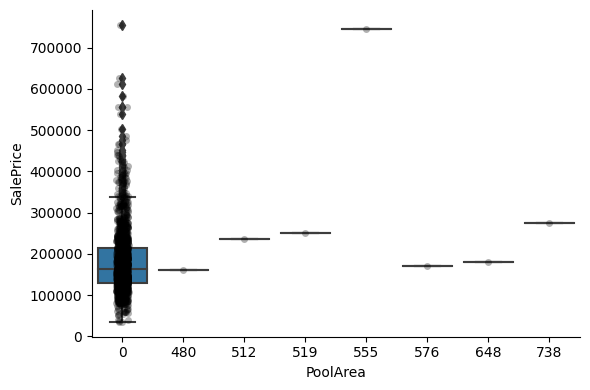

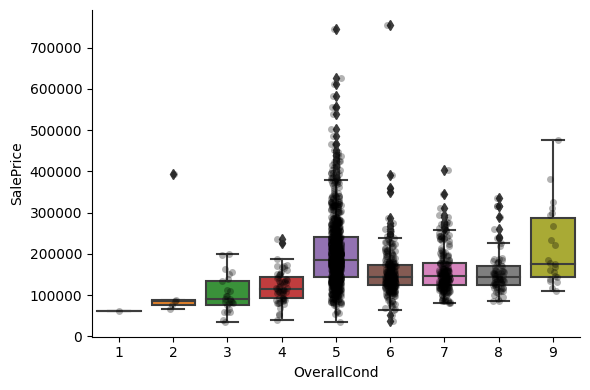

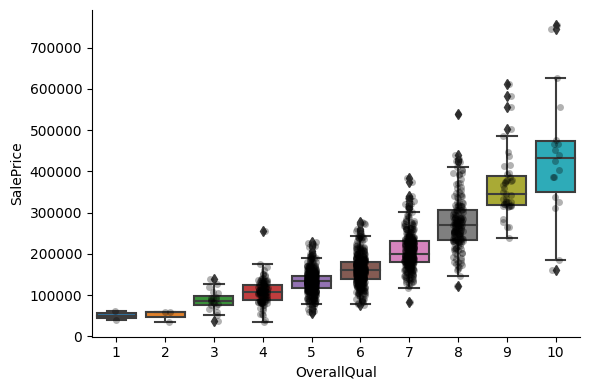

In [30]:
for var in discrete_vars:
  # make boxplot with catplot
  sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
  #add data points to boxplot wiht stripplot
  sns.stripplot(x=var, y ='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
  plt.show()

#**Continuous variables**

In [31]:
# make a list of continuous variables

cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars
]
print('Number pf continuous variables: ', len(cont_vars))


Number pf continuous variables:  18


In [32]:
# let's visalise the continuous variables

data[cont_vars].head()

GrLivArea  BsmtFinSF1  GarageArea  MiscVal  MasVnrArea  TotalBsmtSF  \
0       1710         706         548        0       196.0          856   
1       1262         978         460        0         0.0         1262   
2       1786         486         608        0       162.0          920   
3       1717         216         642        0         0.0          756   
4       2198         655         836        0       350.0         1145   

   2ndFlrSF  BsmtFinSF2  OpenPorchSF  WoodDeckSF  EnclosedPorch  3SsnPorch  \
0       854           0           61           0              0          0   
1         0           0            0         298              0          0   
2       866           0           42           0              0          0   
3       756           0           35           0            272          0   
4      1053           0           84         192              0          0   

   LowQualFinSF  ScreenPorch  LotArea  1stFlrSF  BsmtUnfSF  LotFrontage  
0             0            0     8450       856        150         65.0  
1             0            0     9600      1262        284         80.0  
2             0            0    11250       920        434         68.0  
3             0            0     9550       961        540         60.0  
4             0            0    14260      1145        490         84.0

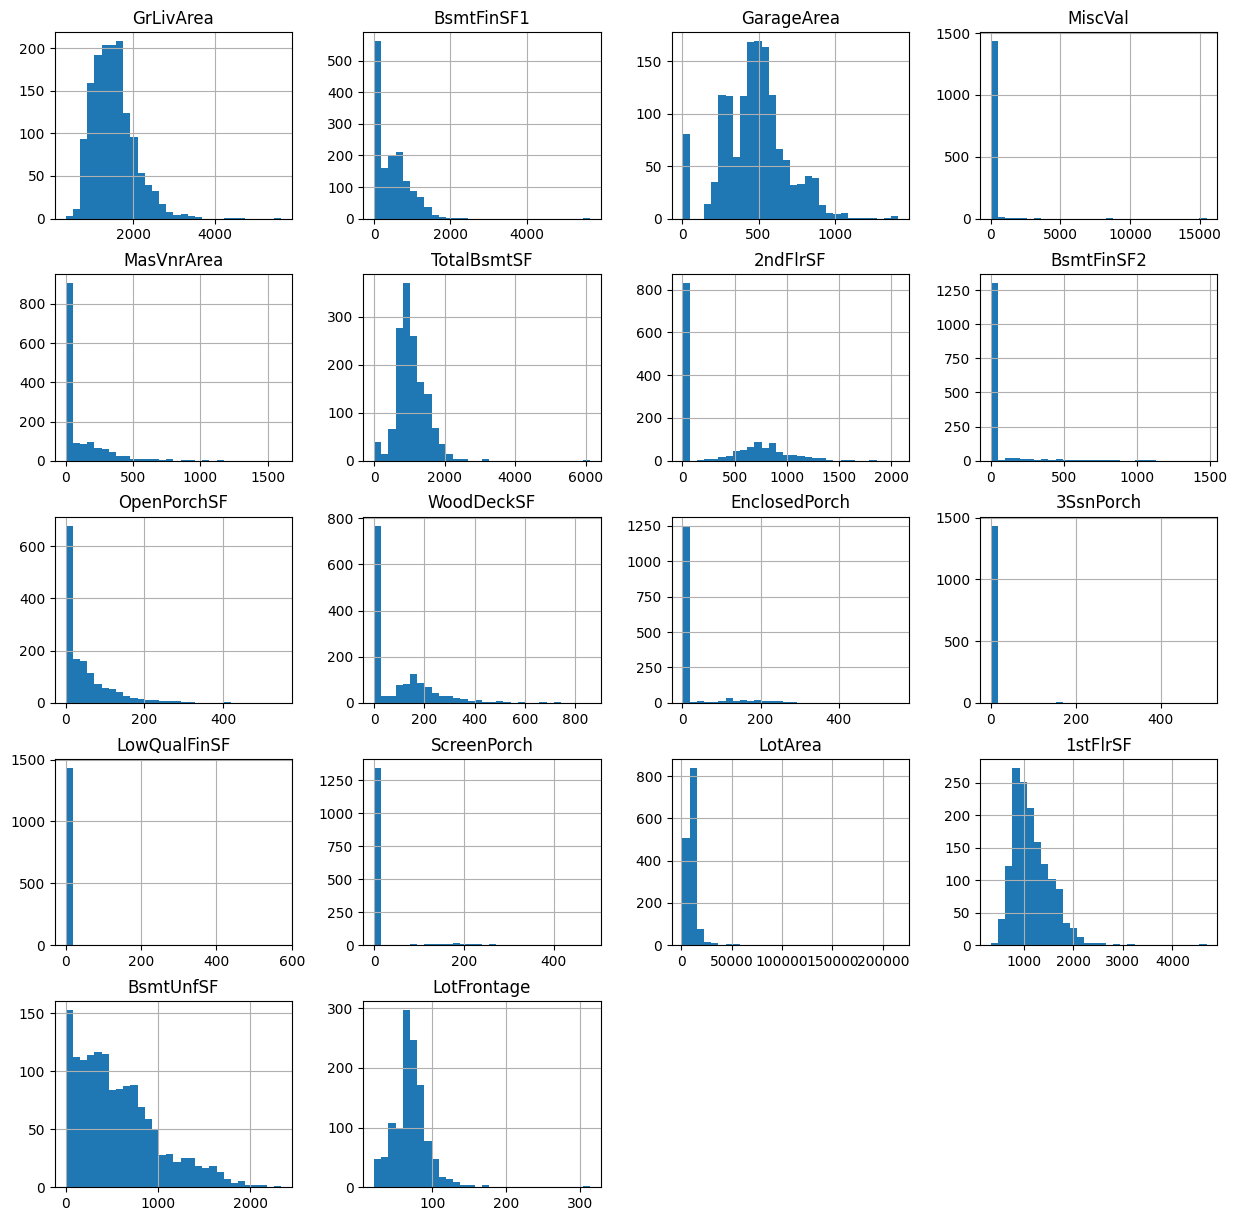

In [33]:
# let's plot histograms for all continuous variables

data[cont_vars].hist(bins=30, figsize=(15,15))

plt.show()

In [34]:
# first make a list with the super skewed variables
# for later

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [35]:
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

#**Yeo-Johnson transformation**

In [36]:
data['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [37]:
data['LotFrontage'].values.reshape(-1,1)

array([[65.],
       [80.],
       [68.],
       ...,
       [66.],
       [68.],
       [75.]])

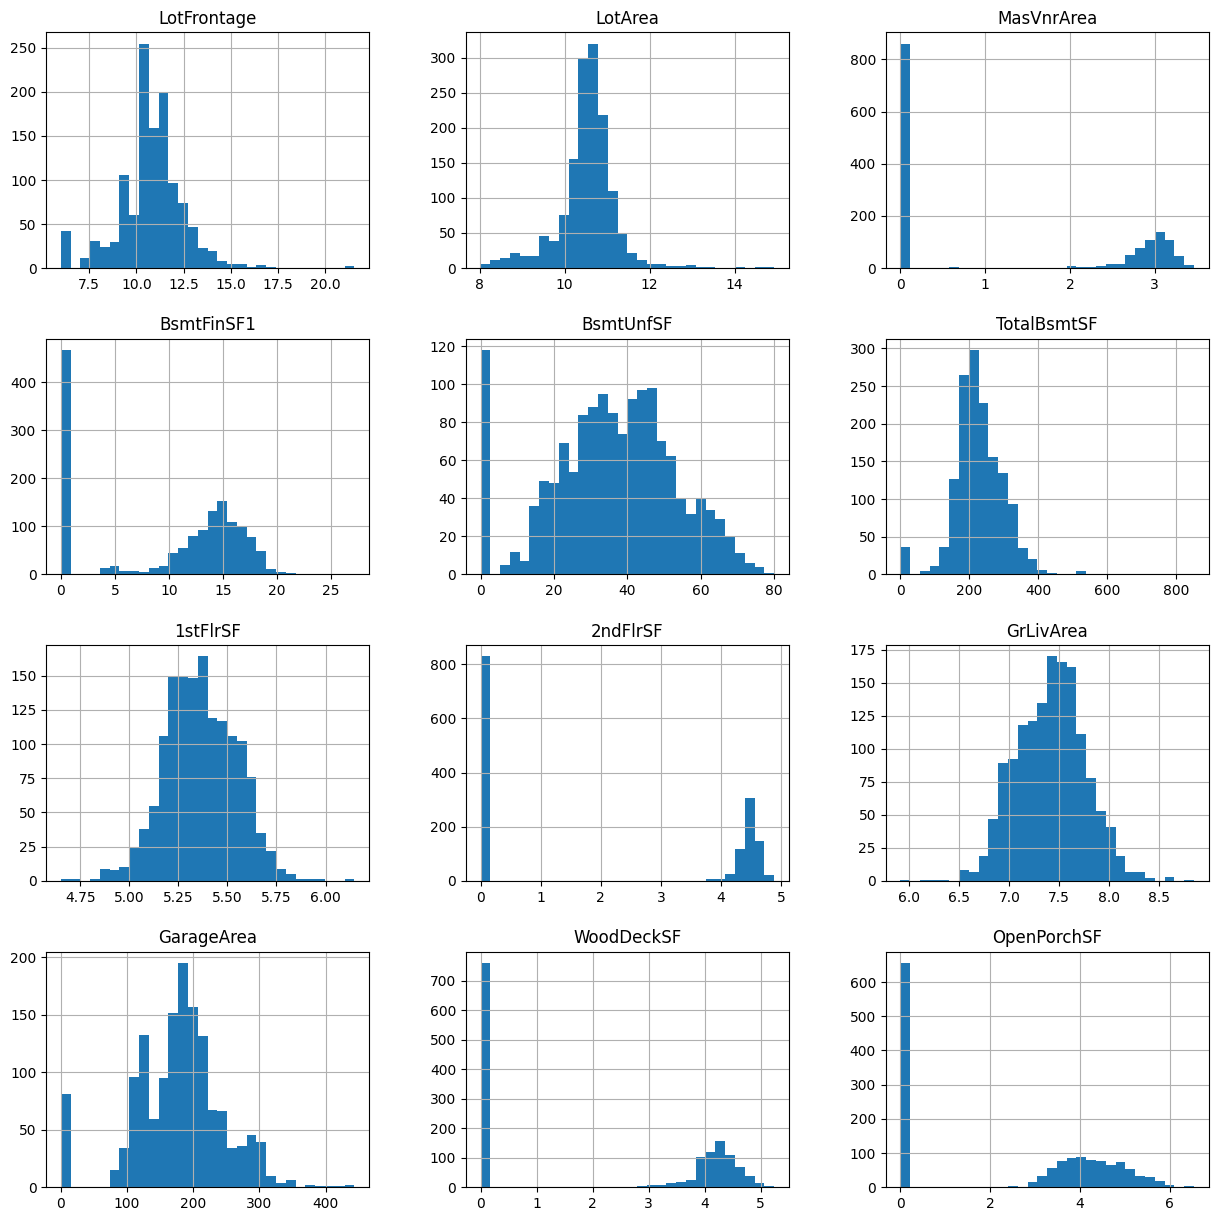

In [38]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

from sklearn.preprocessing import PowerTransformer

# Create an instance of PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Temporary copy of the data
tmp = data.copy()

for var in cont_vars:
    try:
        # Reshape the input data to be a 2D array
        X = data[var].values.reshape(-1, 1)

        # Fit the PowerTransformer on the reshaped data
        pt.fit(X)

        # Transform the variable using the fitted transformer
        tmp[var] = pt.transform(X)

    except ValueError:
        # Handle any errors, such as when the transformation fails
        print(f"Failed to transform variable '{var}' using Yeo-Johnson.")

tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()


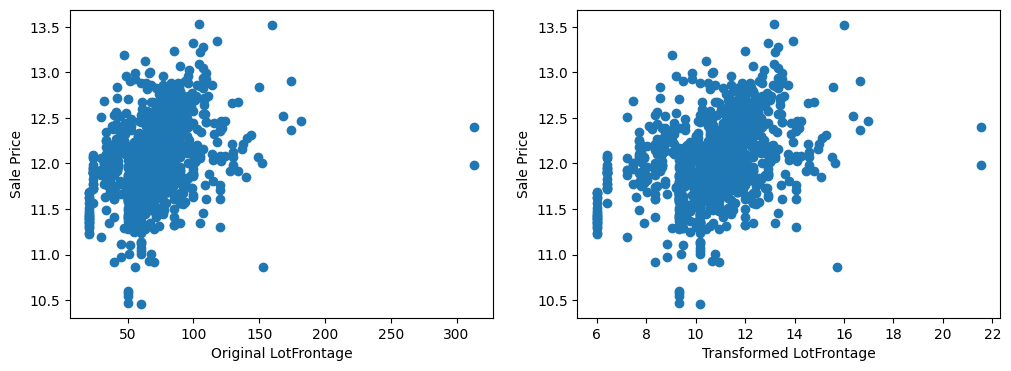

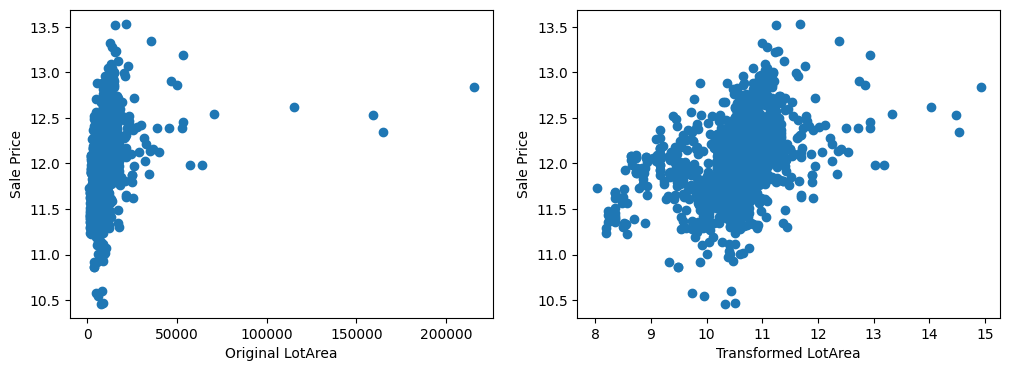

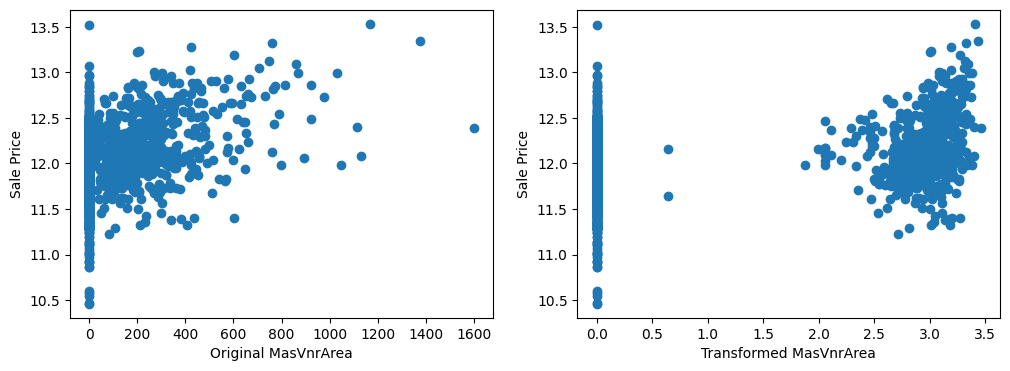

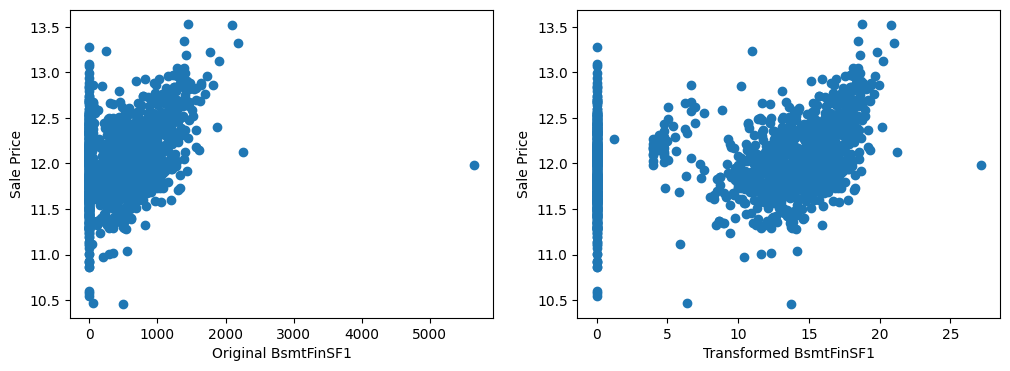

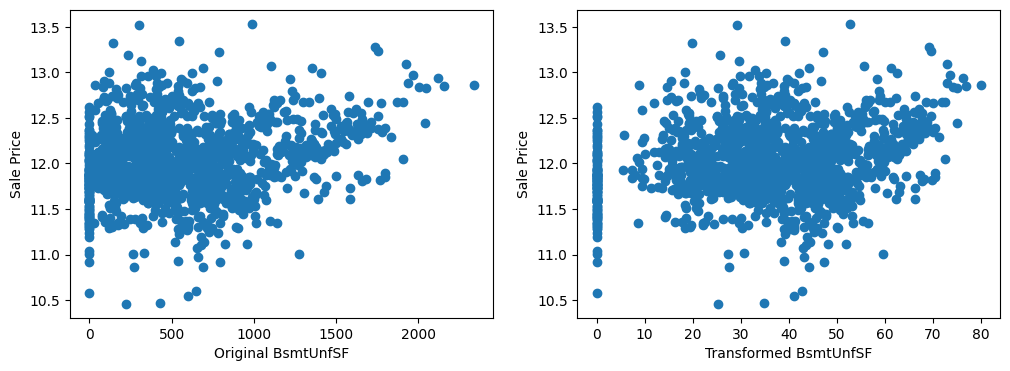

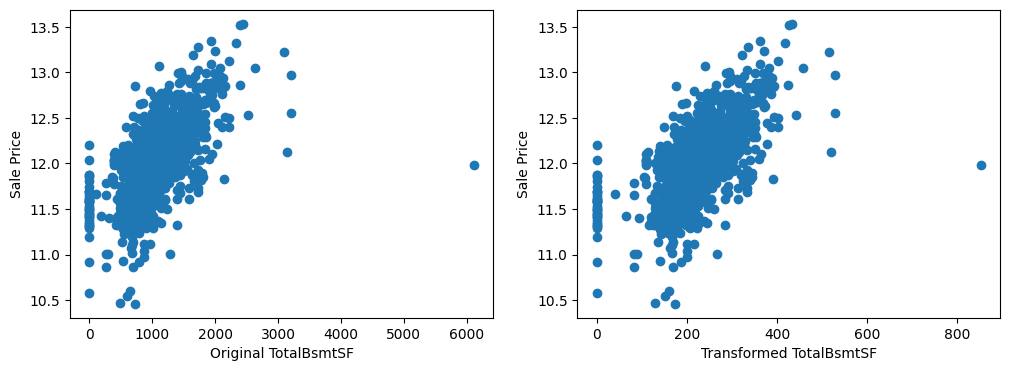

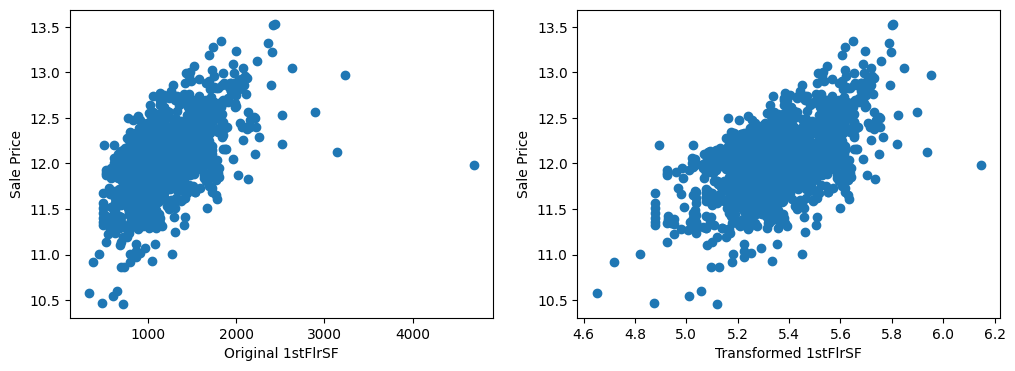

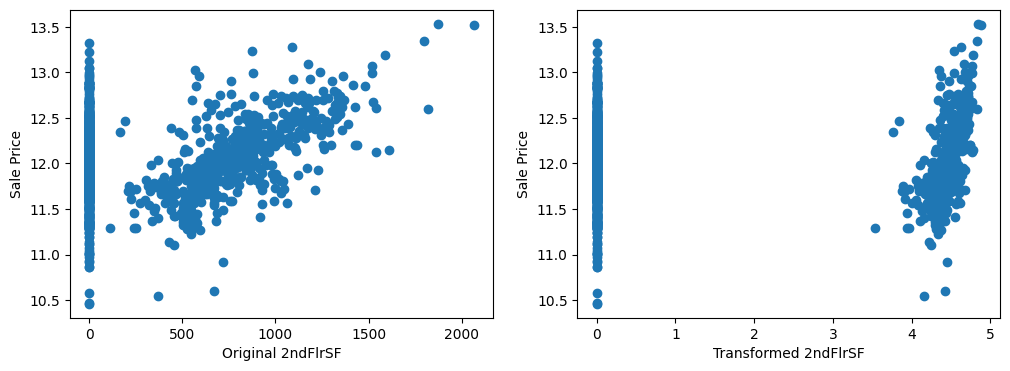

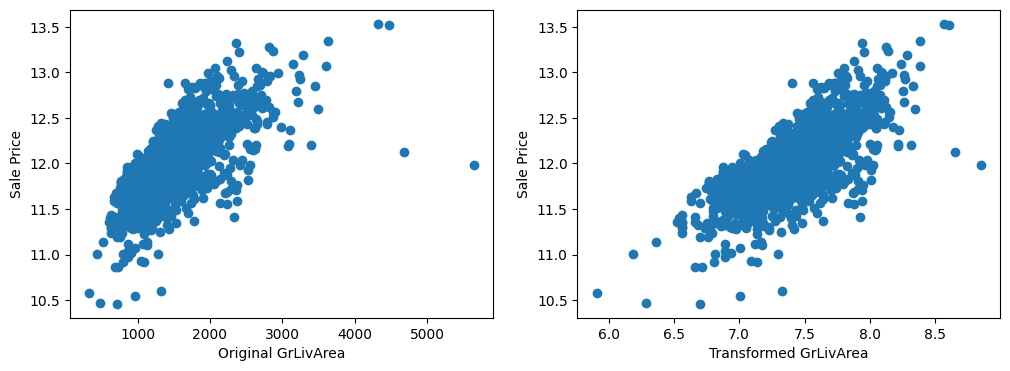

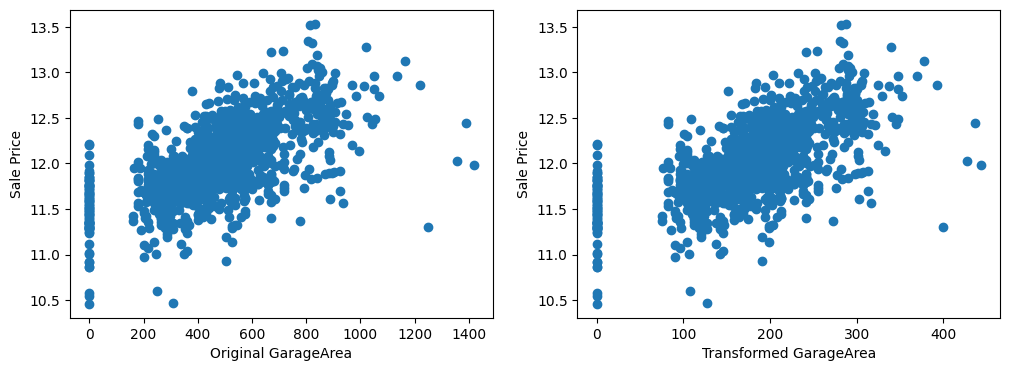

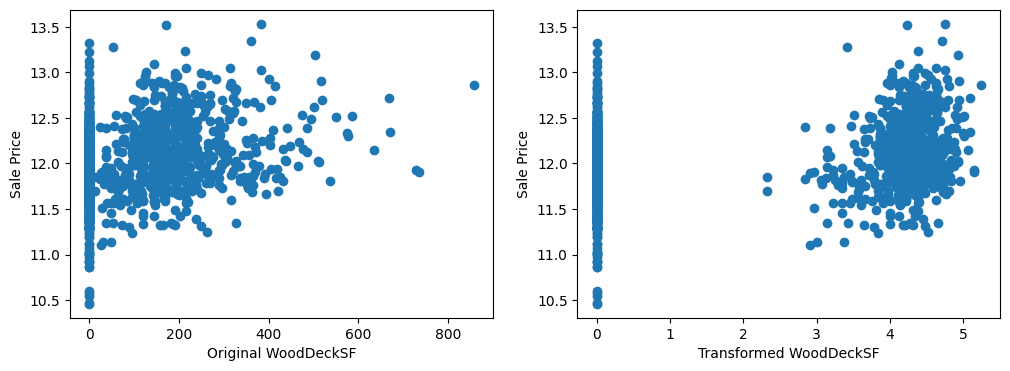

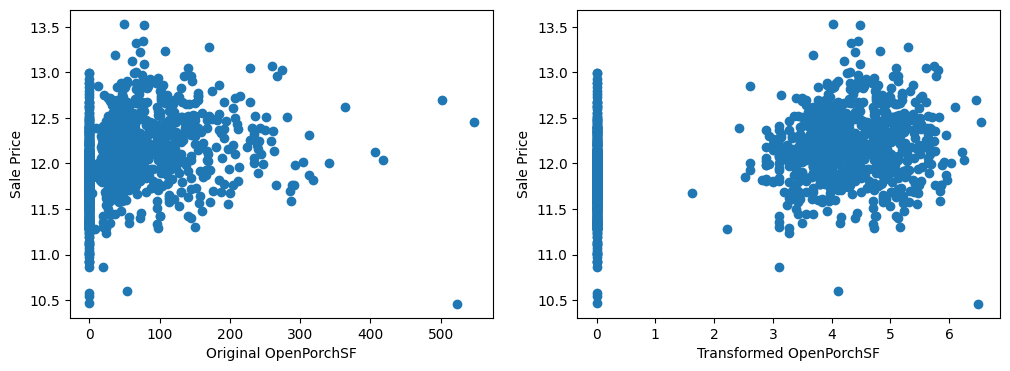

In [39]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in cont_vars:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

#**Logarithmic transformation**

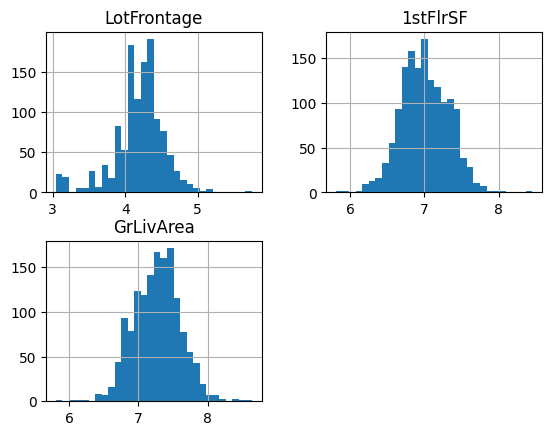

In [40]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

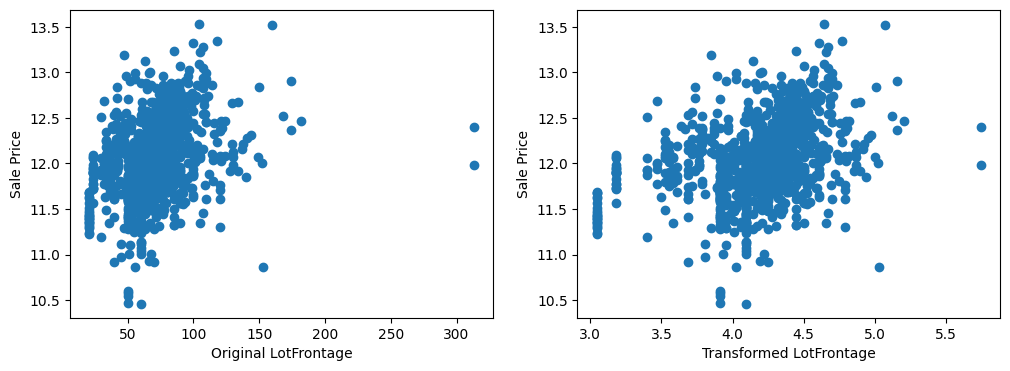

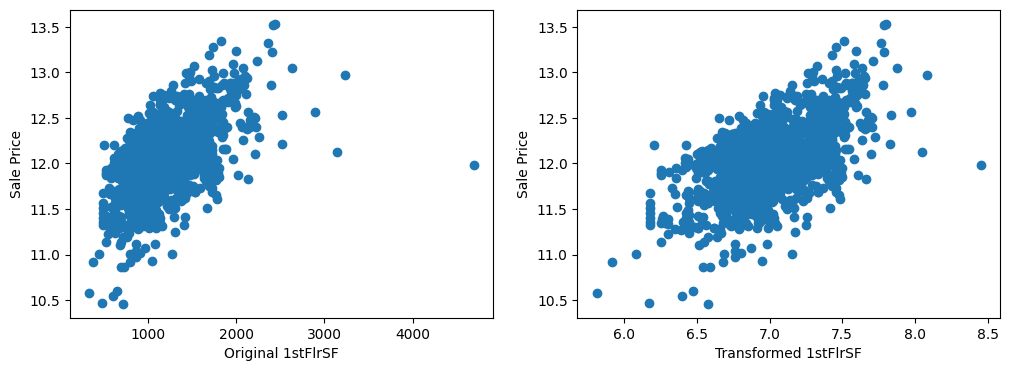

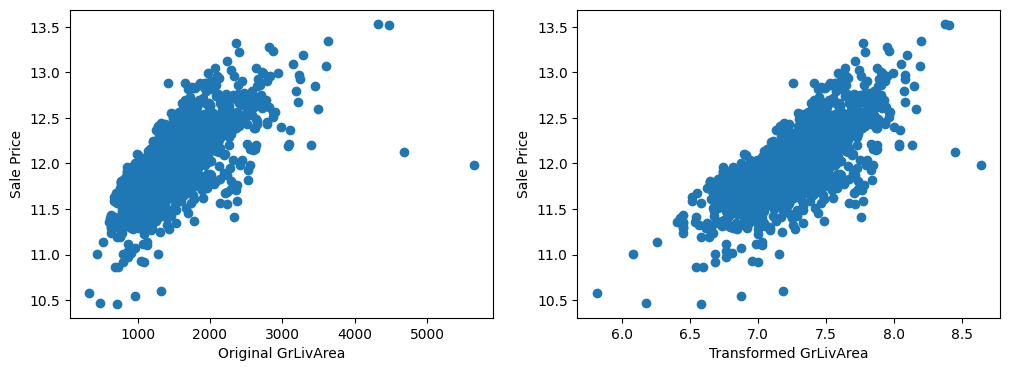

In [41]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

#**Skewed variables**

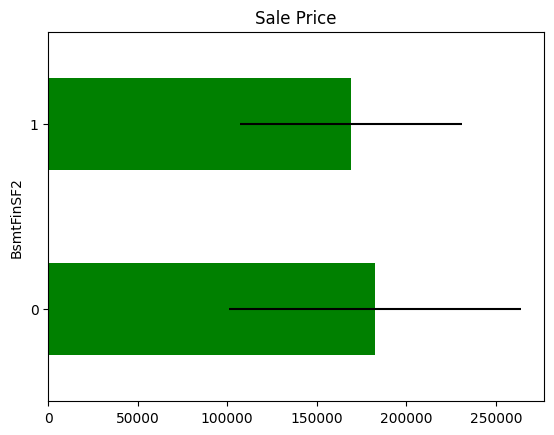

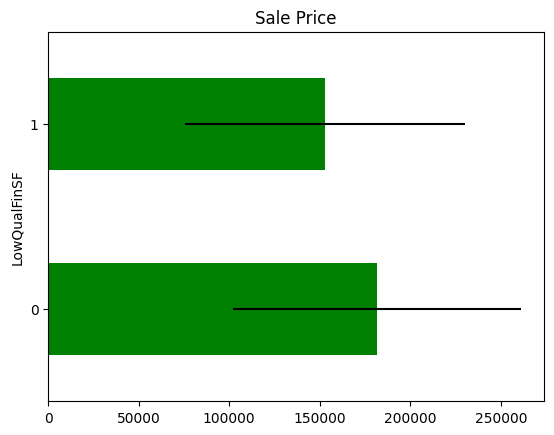

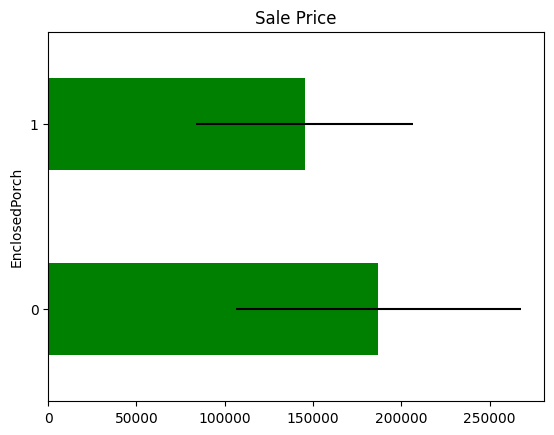

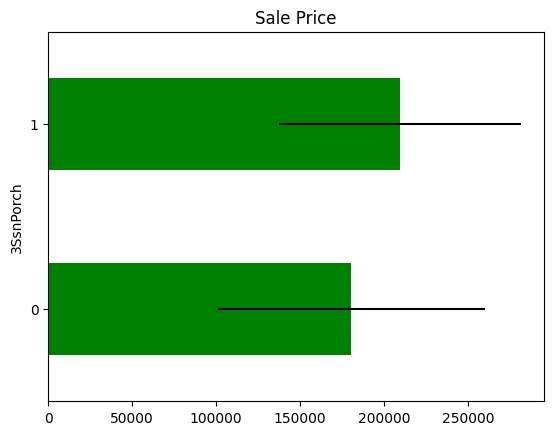

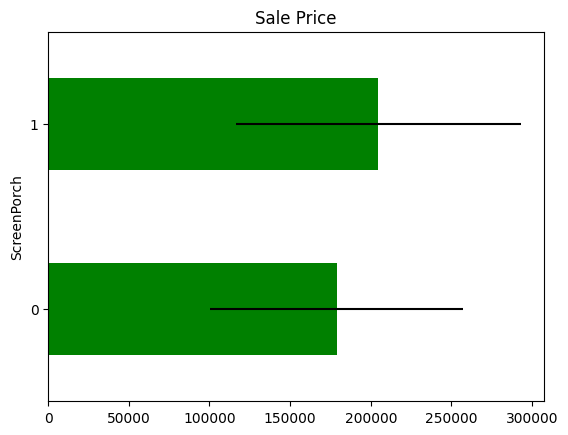

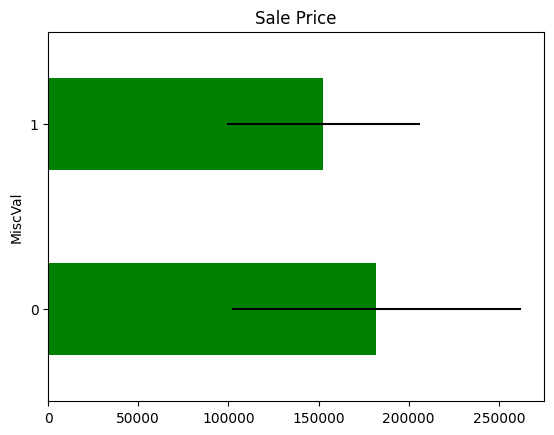

In [43]:
for var in skewed:

  tmp = data.copy()

  # map the variable values into 0 and 1
  tmp[var] = np.where(data[var]==0, 0,1)

  # determine mean sale price in the mapped values
  tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

  # plot into a bar graph
  tmp.plot(kind='barh', y='mean', legend = False,
           xerr='std', title='Sale Price', color='green')

  plt.show()



#**Categorical variables**

In [44]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  44


In [45]:
# let's visualise the values of th categorical variales
data[cat_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

#**Number of labels: cardinality**

<Axes: >

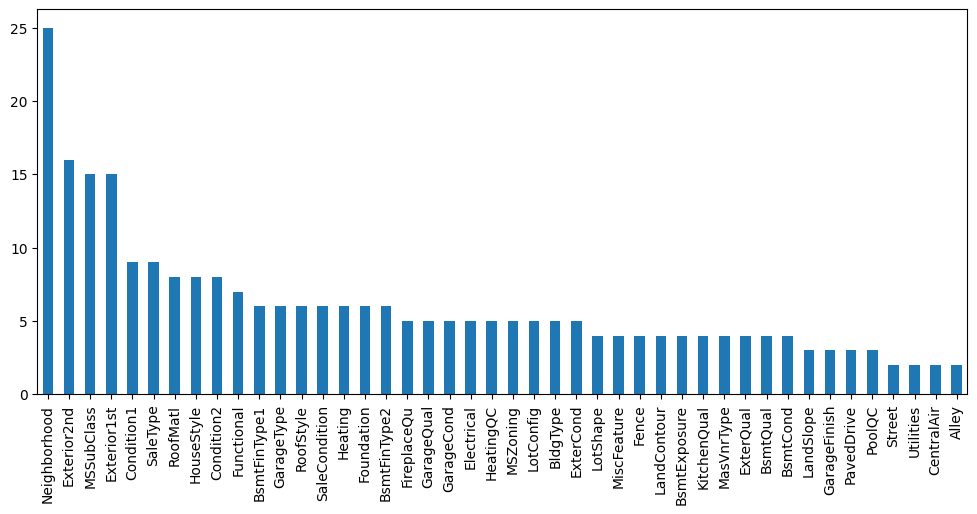

In [48]:
# we count unique categories with pandas unique()
# and then plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))


#**Quality variables**

In [55]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
  data[var] =data[var].map(qual_mappings)

In [56]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [57]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [58]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [59]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [60]:
# capture all quality variables

qual_vars = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

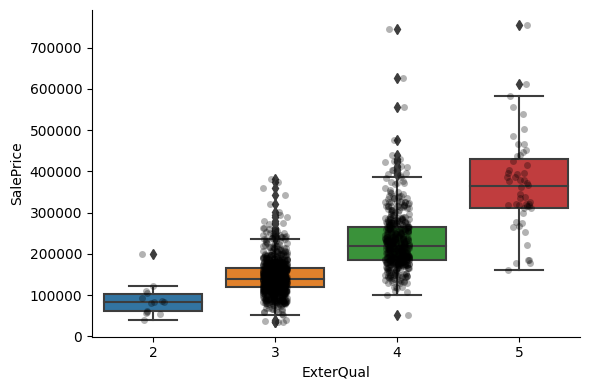

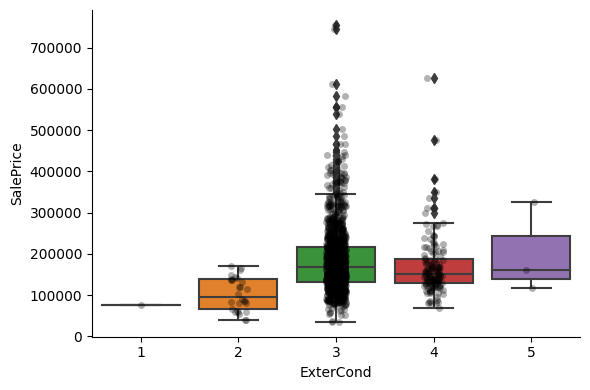

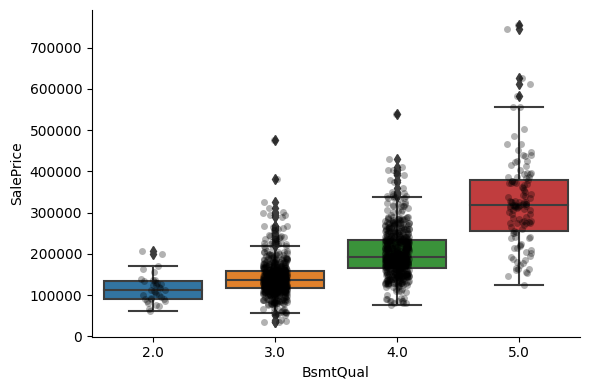

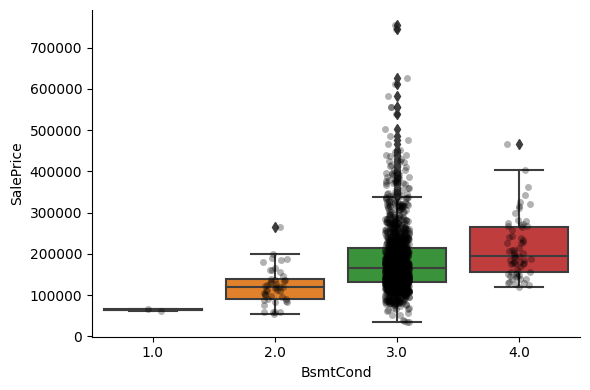

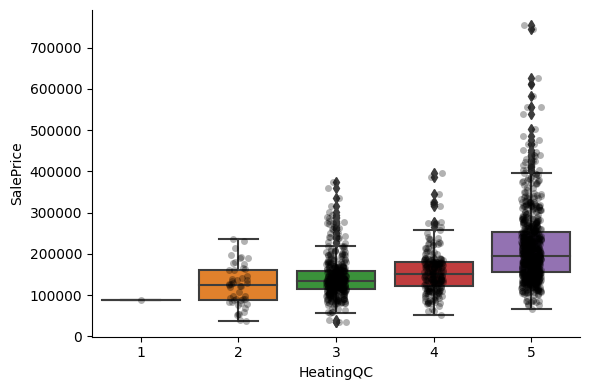

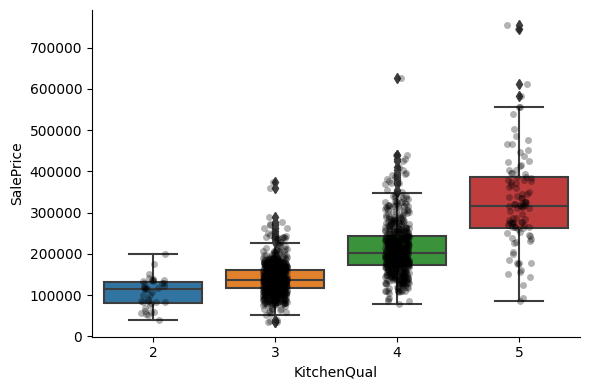

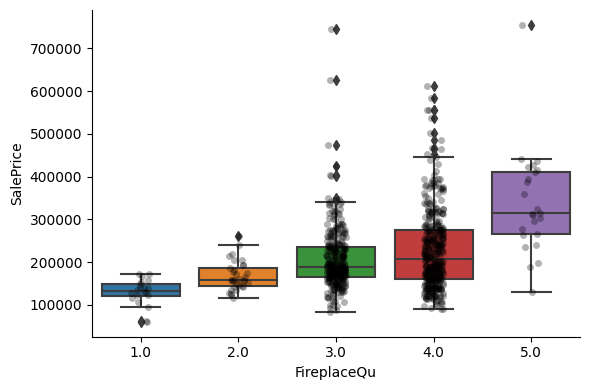

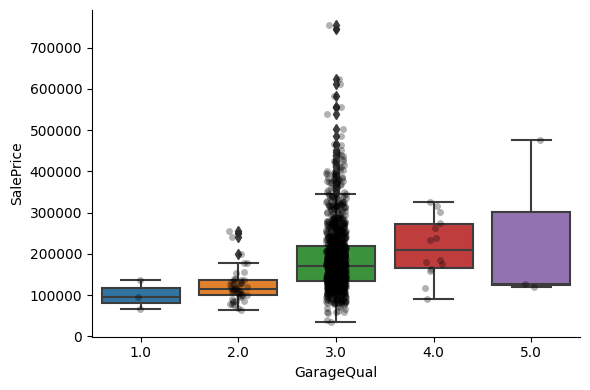

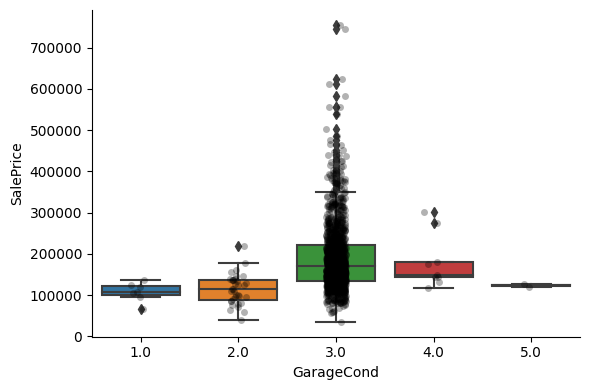

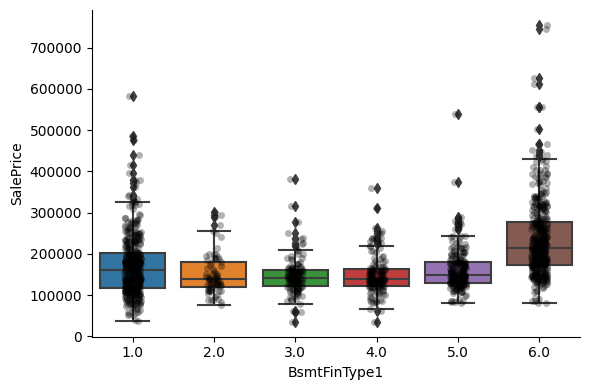

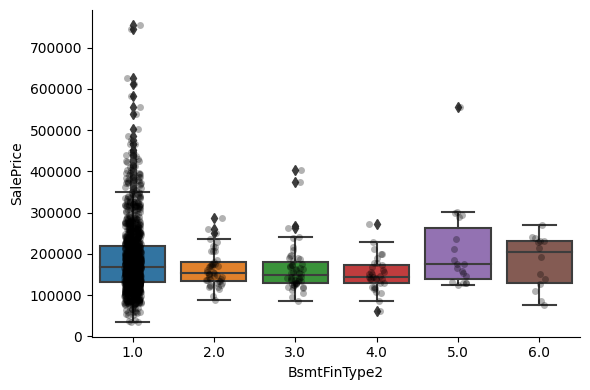

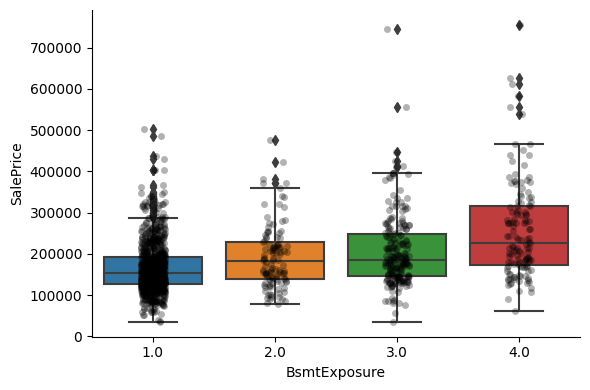

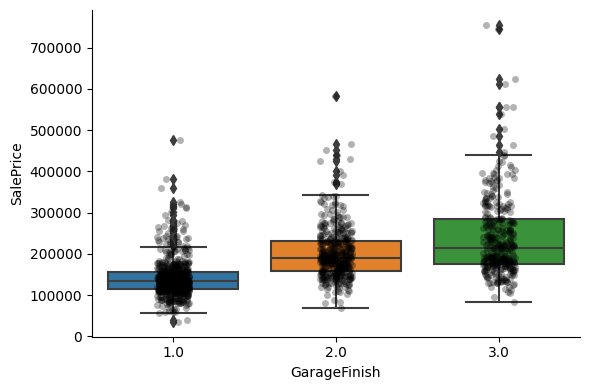

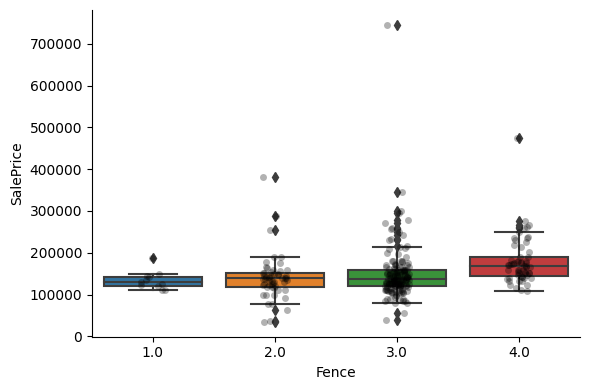

In [61]:
# now let's plot the house mean sale price based on the quality of the various attributes

for var in qual_vars:
  # make boxplot with catplot
  sns.catplot(x=var, y= 'SalePrice', data=data, kind='box', height=4, aspect=1.5)
  # add data points to box plot with stripplot
  sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=00.3, color='k')
  plt.show()




In [62]:
# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

#**Rare labels**

In [68]:

def analyse_rare_labels(df, var, rare_perc):
  df = df.copy()

  # determine the % of observations per category
  tmp = df.groupby(var)['SalePrice'].count()/ len(df)

  # return categories that are rare
  return tmp[tmp<rare_perc]

# print categories that ae present in less than 1 % of the observations
for var in cat_others:
  print(analyse_rare_labels(data, var, 0.01))
  print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

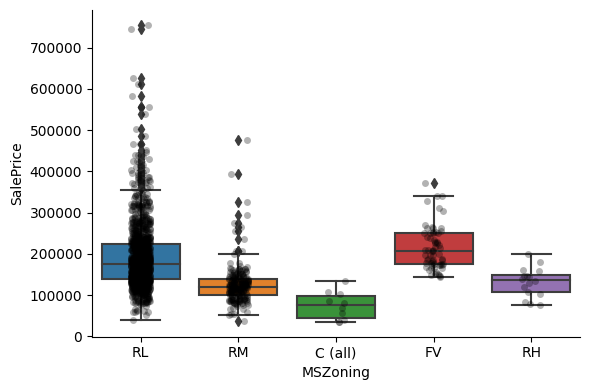

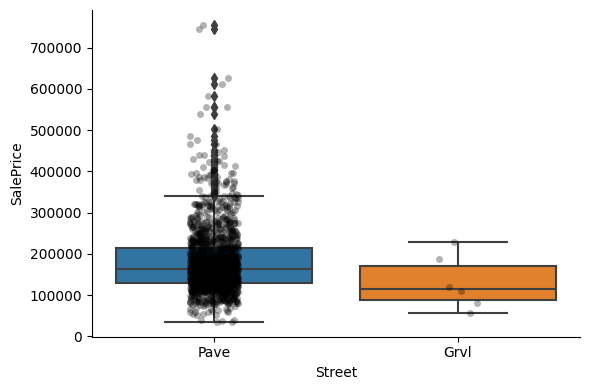

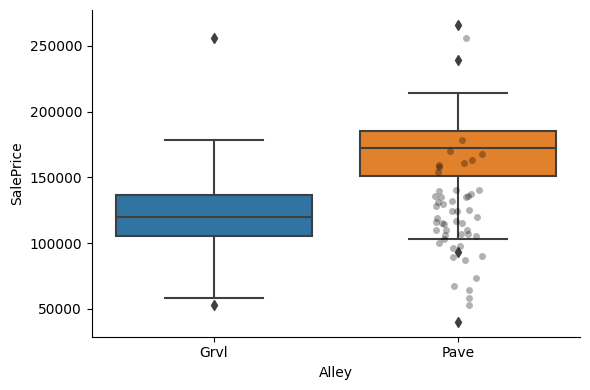

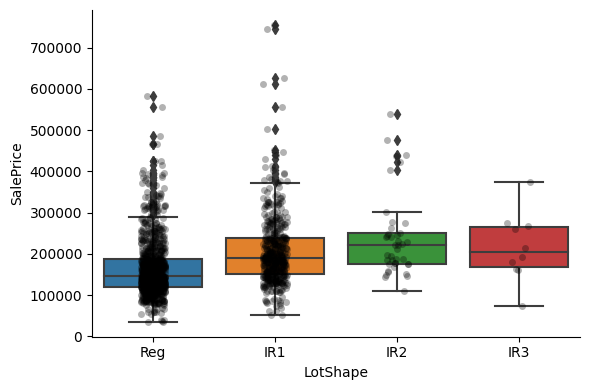

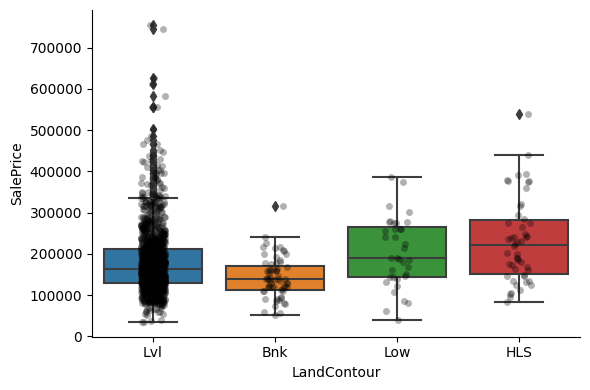

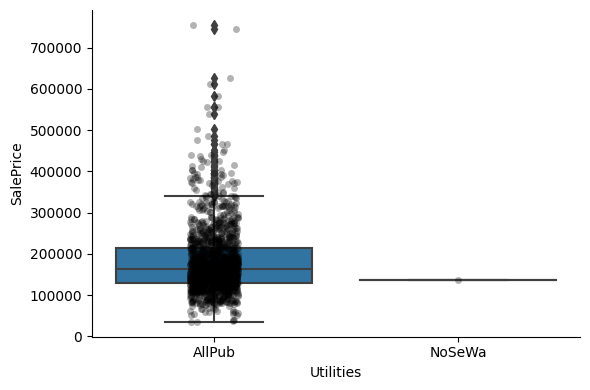

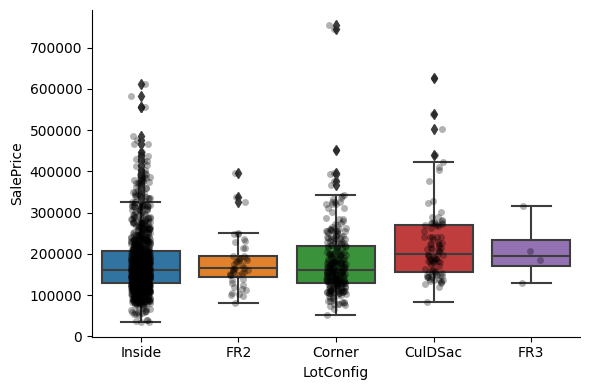

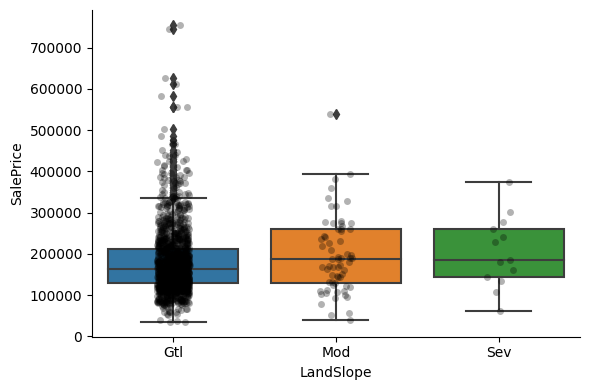

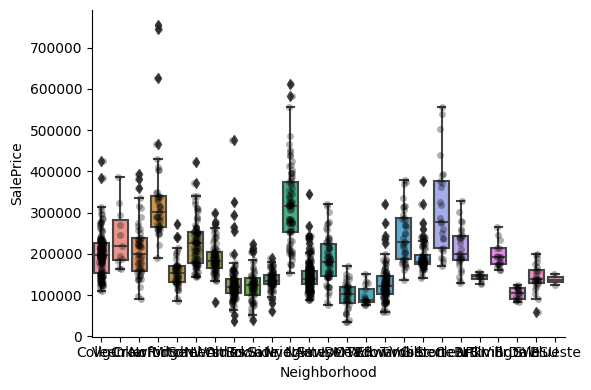

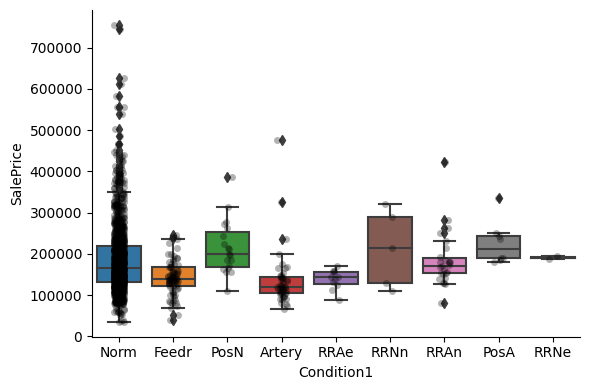

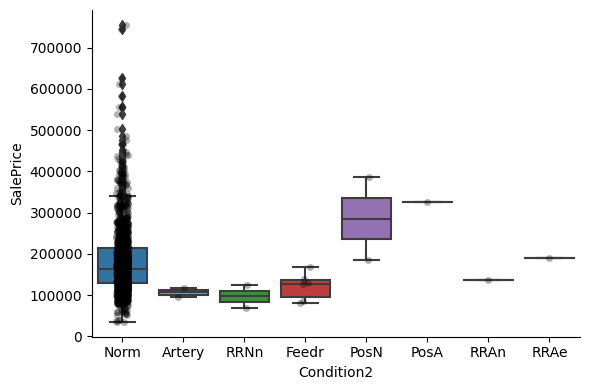

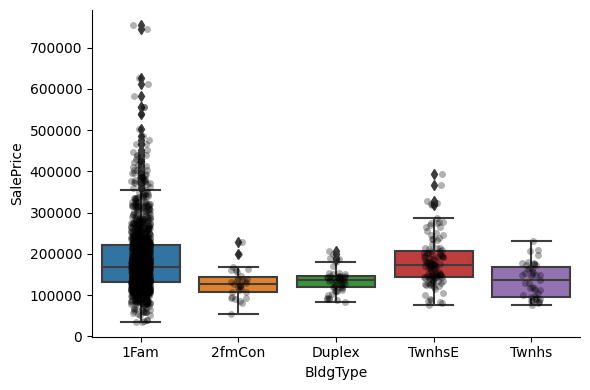

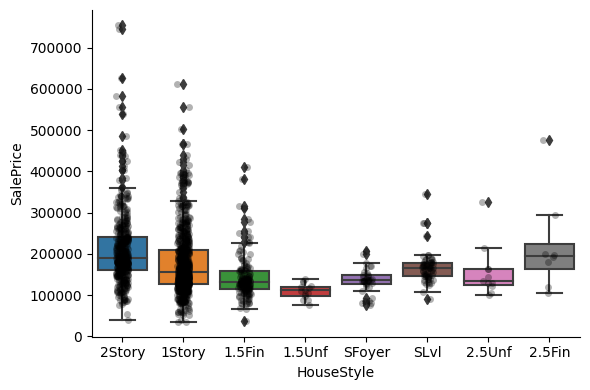

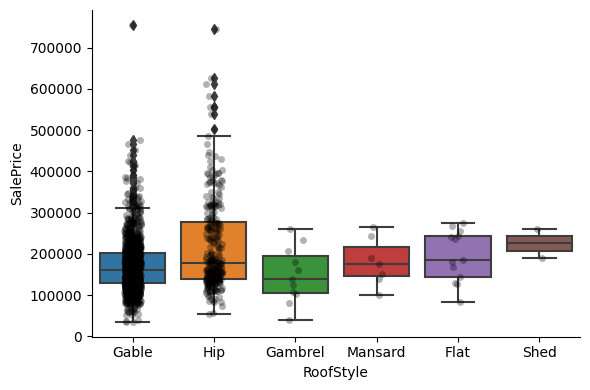

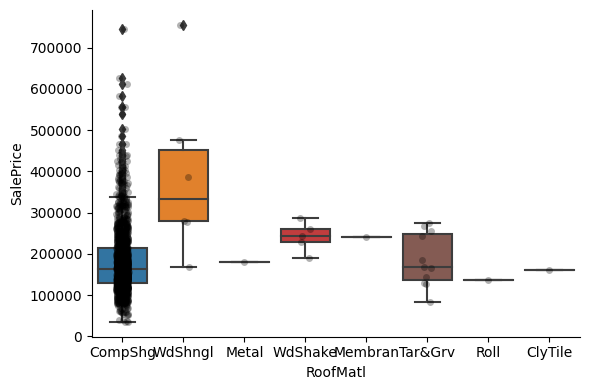

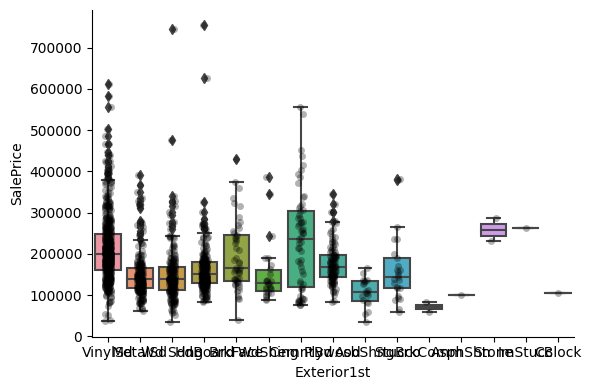

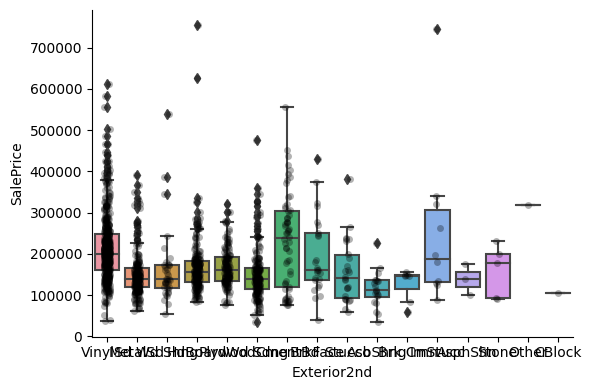

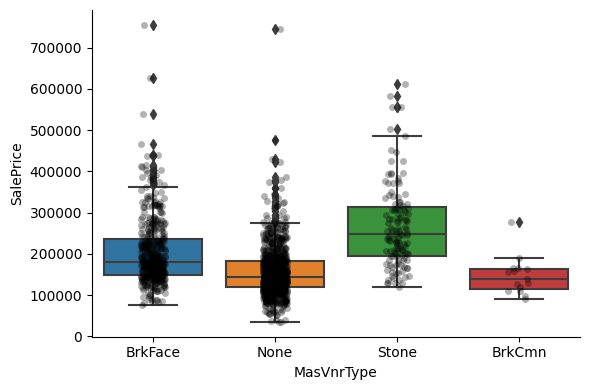

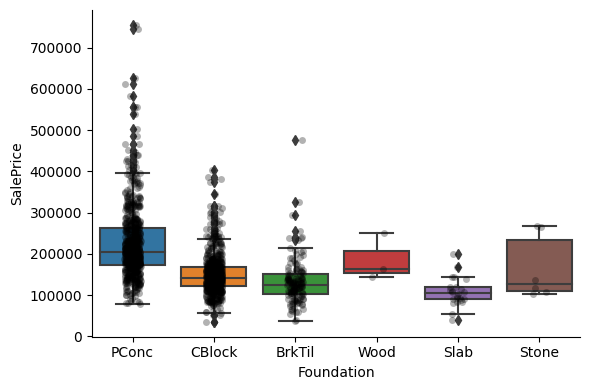

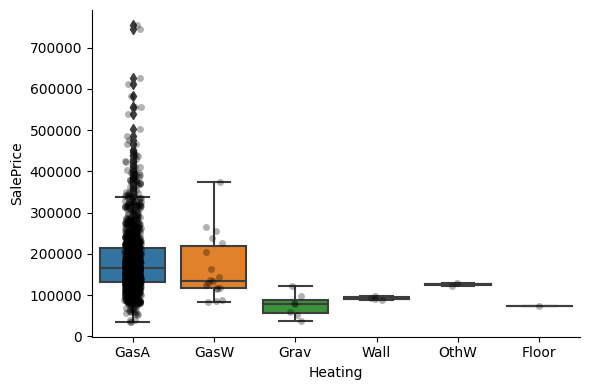

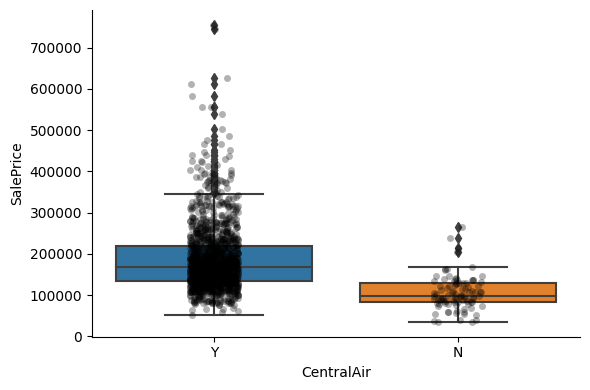

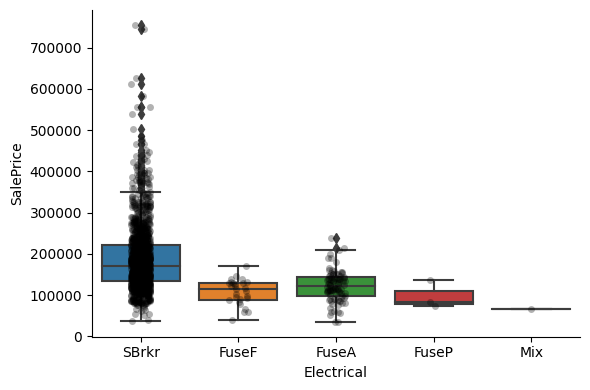

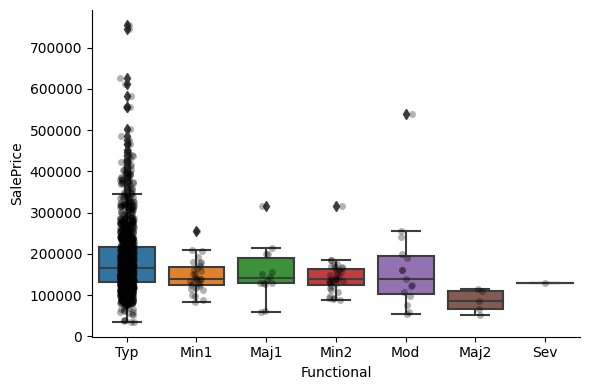

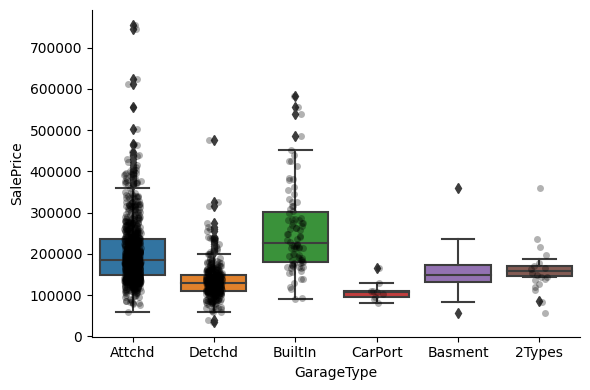

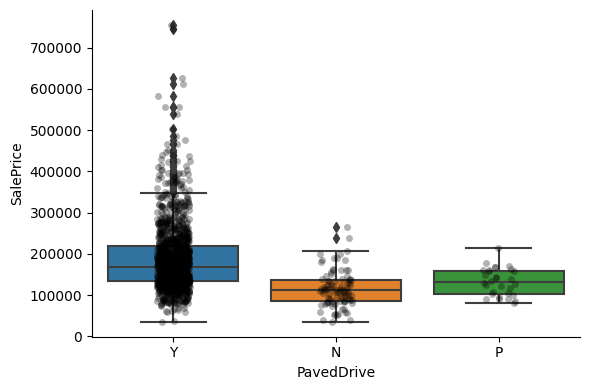

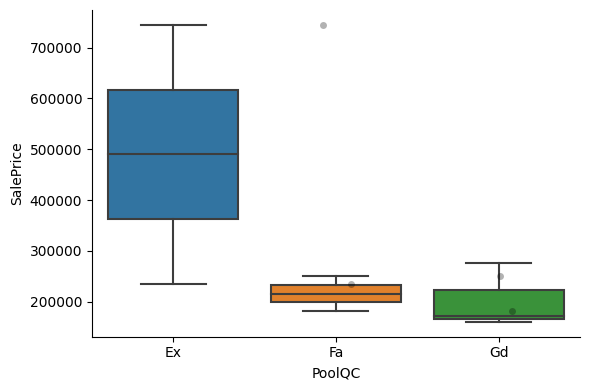

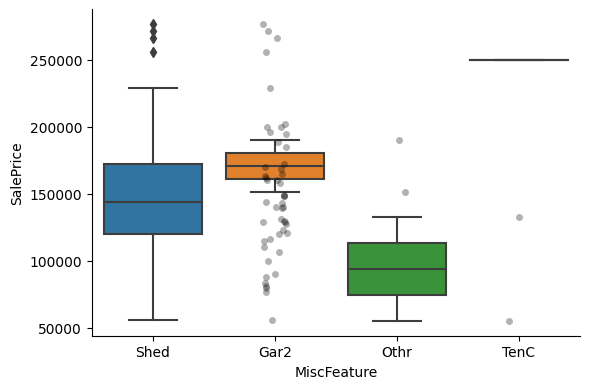

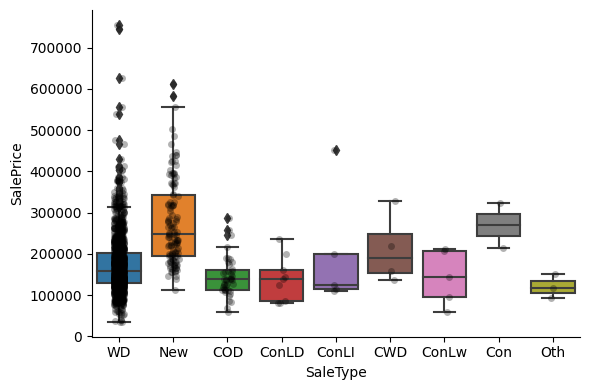

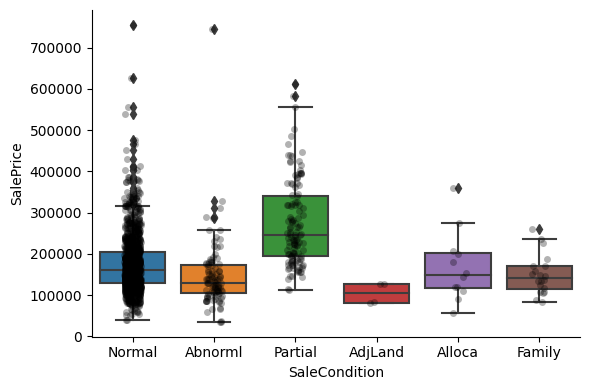

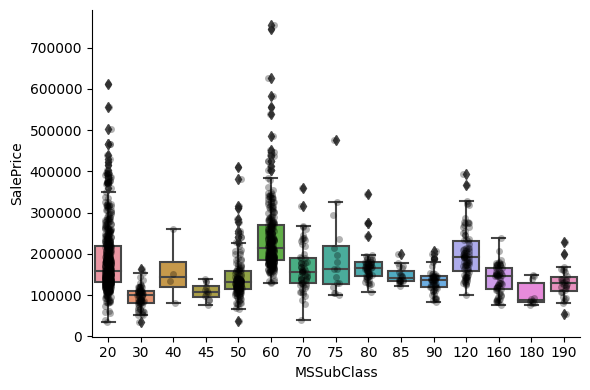

In [80]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()